## Social Media and Network Analytics
#### Anjana Karathat Rajeev

In [55]:
%load_ext autoreload
%autoreload 1
%aimport redditClient
%aimport RedditProcessing

In [1]:
import json
import pandas as pd
with open('singul.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame from the loaded dictionary
df = pd.DataFrame.from_dict(data['submissions'])

df.head()

title                author  \
0         Official r/singularity Discord server link        DnDNecromantic   
1           Jimmy Apple returns with news of Arrakis           metalman123   
2  After ChatGPT disruption, Stack Overflow lays ...             meowerguy   
3  Baidu released Ernie 4.0, CEO Robin Li claims ...                czk_21   
4  Prompt crafting remains important. GPT-4 is fi...  BeginningInfluence55   

   score  Number of comments  \
0     67                   0   
1     99                  64   
2    426                 107   
3     94                  30   
4     64                  18   

                                           self text     timestamp  \
0                                                     1.690971e+09   
1                                                     1.697575e+09   
2                                                     1.697545e+09   
3                                                     1.697569e+09   
4  \nIn case someone wants to play around with it...  1.697574e+09   

   upvoteratio                                           comments  
0         0.94                                                 []  
1         0.92  [{'body': 'Okay boys I paid for it, here are t...  
2         0.96  [{'body': 'Remember when everyone said it was ...  
3         0.90  [{'body': 'didnt find any technical specificat...  
4         0.94  [{'body': 'It was right by the way. The animal...

In [2]:
def concatenate_comments(comments):
    return ' '.join([comment["body"] for comment in comments])

# Apply the function to each record
df["comments"] = df["comments"].apply(concatenate_comments)

In [3]:
df.head()

title                author  \
0         Official r/singularity Discord server link        DnDNecromantic   
1           Jimmy Apple returns with news of Arrakis           metalman123   
2  After ChatGPT disruption, Stack Overflow lays ...             meowerguy   
3  Baidu released Ernie 4.0, CEO Robin Li claims ...                czk_21   
4  Prompt crafting remains important. GPT-4 is fi...  BeginningInfluence55   

   score  Number of comments  \
0     67                   0   
1     99                  64   
2    426                 107   
3     94                  30   
4     64                  18   

                                           self text     timestamp  \
0                                                     1.690971e+09   
1                                                     1.697575e+09   
2                                                     1.697545e+09   
3                                                     1.697569e+09   
4  \nIn case someone wants to play around with it...  1.697574e+09   

   upvoteratio                                           comments  
0         0.94                                                     
1         0.92  Okay boys I paid for it, here are the screensh...  
2         0.96  Remember when everyone said it was just a coin...  
3         0.90  didnt find any technical specification, just s...  
4         0.94  It was right by the way. The animal in the ima...

### Summary Statistics

Text(0.5, 1.0, 'Distribution of score')

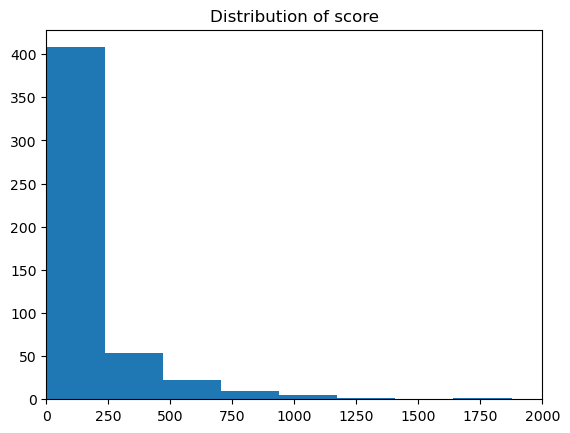

In [4]:
import matplotlib.pyplot as plt
plt.hist(df['score'])
plt.xlim(0, 2000)
plt.title('Distribution of score')

Text(0.5, 1.0, 'Distribution of Upvote ratio')

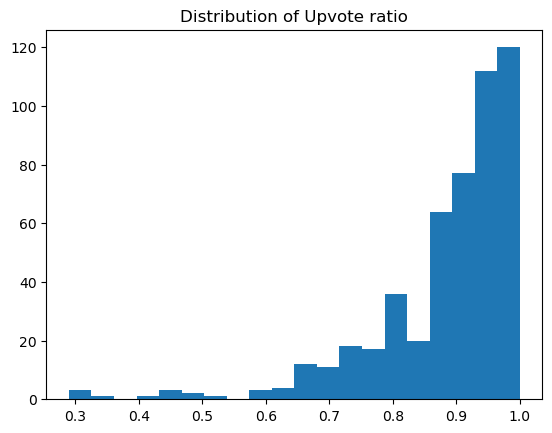

In [5]:
plt.hist(df['upvoteratio'],bins=20)
#plt.xlim(0, 200)
plt.title('Distribution of Upvote ratio')

In [171]:
idx = df['upvoteratio'].idxmax()
df.loc[idx]

title                              LINGO-1: Exploring Natural Language for Autono...
author                                                                       vegax87
score                                                                             20
Number of comments                                                                 4
self text                                                                           
timestamp                                                               1694733530.0
upvoteratio                                                                      1.0
comments                           Ive been waiting for OpenAi to look into this ...
Title                              lingo1 exploring natural language for autonomo...
Self Text                                                                           
Top Comments                       ive been waiting for openai to look into this ...
tokenized_title                    [lingo1, exploring, natural, l

In [172]:
print("Title:",df.loc[idx]['title'],"\nSelf Text:",df.loc[idx]['self text'],"\nUpvote Ratio:", df.loc[idx]['upvoteratio'])

Title: LINGO-1: Exploring Natural Language for Autonomous Driving - Wayve 
Self Text:  
Upvote Ratio: 1.0


In [173]:
idx = df['score'].idxmax()
df.loc[idx]

title                                                     Something to think about 🤔
author                                                                      Pro_RazE
score                                                                           2345
Number of comments                                                               452
self text                                                                           
timestamp                                                               1696163188.0
upvoteratio                                                                     0.93
comments                           When it can self improve in an unrestricted wa...
Title                                                      something to think about 
Self Text                                                                           
Top Comments                       when it can self improve in an unrestricted wa...
tokenized_title                                        [something

In [174]:
print("Title:",df.loc[idx]['title'],"\ncomments:",df.loc[idx]['comments'],"\nUpvote Ratio:", df.loc[idx]['upvoteratio'])

Title: Something to think about 🤔 
comments: When it can self improve in an unrestricted way things are going to get weird When selfimprovement loop will close well head to new unknown world

I wonder how much current sota models help with testing coding and producing synthetics data for next models No the scary thing about all this is that despite knowing routhly where this is going and that the speed of progress is accelerating most people seem to be still more worried about things like copyright and misinformation than what the bigger implications of these developments for society as a whole are That is something to think about The real switch is when the entire supply chain is automated and AI can build its own data centres without human involvement Thats when AI can be considered as a new lifeform Until it is self replicating it remains a human tool Recursive selfimprovement is key  Once we can achieve that the singularity has officially begun and we will be at the bottom of the e

In [175]:
idx = df['Number of comments'].idxmax()
df.loc[idx]

title                                                       Taking Dall-E 3 requests
author                                                                      Derpgeek
score                                                                           1072
Number of comments                                                              1243
self text                          If you have any requests I’ll try to get to yo...
timestamp                                                               1695575720.0
upvoteratio                                                                     0.91
comments                           A screenshot of Skyrim as a SNES style JRPG I ...
Title                                                        taking dalle 3 requests
Self Text                          if you have any requests ill try to get to you...
Top Comments                       a screenshot of skyrim as a snes style jrpg i ...
tokenized_title                                         [taking, 

In [14]:
df = df.dropna()

In [15]:
df.head()

title                author  \
0         Official r/singularity Discord server link        DnDNecromantic   
1           Jimmy Apple returns with news of Arrakis           metalman123   
2  After ChatGPT disruption, Stack Overflow lays ...             meowerguy   
3  Baidu released Ernie 4.0, CEO Robin Li claims ...                czk_21   
4  Prompt crafting remains important. GPT-4 is fi...  BeginningInfluence55   

   score  Number of comments  \
0     67                   0   
1     99                  64   
2    426                 107   
3     94                  30   
4     64                  18   

                                           self text     timestamp  \
0                                                     1.690971e+09   
1                                                     1.697575e+09   
2                                                     1.697545e+09   
3                                                     1.697569e+09   
4  \nIn case someone wants to play around with it...  1.697574e+09   

   upvoteratio                                           comments  
0         0.94                                                     
1         0.92  Okay boys I paid for it, here are the screensh...  
2         0.96  Remember when everyone said it was just a coin...  
3         0.90  didnt find any technical specification, just s...  
4         0.94  It was right by the way. The animal in the ima...

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 504
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               503 non-null    object 
 1   author              503 non-null    object 
 2   score               503 non-null    int64  
 3   Number of comments  503 non-null    int64  
 4   self text           503 non-null    object 
 5   timestamp           503 non-null    float64
 6   upvoteratio         503 non-null    float64
 7   comments            503 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 35.4+ KB


#### Removing special characters

In [17]:
import re
df["Title"] = df["title"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df["Self Text"] = df["self text"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df["comments"] = df["comments"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

#### Converting to lowercase and tokenizing the title and the content text

In [18]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Convert text to lowercase
df["Title"] = df["Title"].str.lower()
df["Self Text"] = df["Self Text"].str.lower()
df["Top Comments"] = df["comments"].str.lower()

# Tokenize text
df["tokenized_title"] = df["Title"].apply(word_tokenize)
df["tokenized_text"] = df["Self Text"].apply(word_tokenize)
df["tokenized_comments"] = df["Top Comments"].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Removing stopwords

In [19]:
lPunct = ['.', ',', ';', ':', '!', '?', '"', "'", '-']
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']

In [20]:
df['tokenized_title_no_stopwords'] = df['tokenized_title'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])
df['tokenized_text_no_stopwords'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])
df['tokenized_comments_no_stopwords'] = df['tokenized_comments'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])

In [21]:
df

title                author  \
0           Official r/singularity Discord server link        DnDNecromantic   
1             Jimmy Apple returns with news of Arrakis           metalman123   
2    After ChatGPT disruption, Stack Overflow lays ...             meowerguy   
3    Baidu released Ernie 4.0, CEO Robin Li claims ...                czk_21   
4    Prompt crafting remains important. GPT-4 is fi...  BeginningInfluence55   
..                                                 ...                   ...   
500        Ultimate Question (surrounding AI and Jobs)   Serious-Cucumber-54   
501  I created this video entirely on my cell phone...           johngrady77   
502  Video Translation - Translate Your Videos Into...  GlumPresentation8144   
503  Possibility of either Artificially Grown Organ...             Jacob3306   
504              Ready or Not: AI Enters the Workforce            Buck-Nasty   

     score  Number of comments  \
0       67                   0   
1       99                  64   
2      426                 107   
3       94                  30   
4       64                  18   
..     ...                 ...   
500     13                   7   
501    689                 124   
502     18                  12   
503     34                  82   
504     62                  13   

                                             self text     timestamp  \
0                                                       1.690971e+09   
1                                                       1.697575e+09   
2                                                       1.697545e+09   
3                                                       1.697569e+09   
4    \nIn case someone wants to play around with it...  1.697574e+09   
..                                                 ...           ...   
500  The ultimate question is whether AI will lower...  1.694729e+09   
501                                                     1.694613e+09   
502  HeyGen's new feature, Video Translation, is re...  1.694679e+09   
503  Hey! Iv'e been wondering if in my lifetime (cu...  1.694663e+09   
504                                                     1.694650e+09   

     upvoteratio                                           comments  \
0           0.94                                                      
1           0.92  Okay boys I paid for it here are the screensho...   
2           0.96  Remember when everyone said it was just a coin...   
3           0.90  didnt find any technical specification just sh...   
4           0.94  It was right by the way The animal in the imag...   
..           ...                                                ...   
500         0.85  The COL should near directly reduce in paralle...   
501         0.97  When this is real time or even within 5 second...   
502         0.82  I could make an anime and then translate the v...   
503         0.82  If the world doesnt destroy itself youll proba...   
504         0.97  Its all over my industry right now tv and its ...   

                                                 Title  \
0            official rsingularity discord server link   
1             jimmy apple returns with news of arrakis   
2    after chatgpt disruption stack overflow lays o...   
3    baidu released ernie 40 ceo robin li claims th...   
4    prompt crafting remains important gpt4 is fixe...   
..                                                 ...   
500          ultimate question surrounding ai and jobs   
501  i created this video entirely on my cell phone...   
502  video translation  translate your videos into ...   
503  possibility of either artificially grown organ...   
504               ready or not ai enters the workforce   

                                             Self Text  \
0                                                        
1                                                        
2                                                        
3                               

#### Convert time stamp to date

In [22]:
# Convert the timestamp column to a datetime format
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

In [23]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [24]:
df

title                author  \
0           Official r/singularity Discord server link        DnDNecromantic   
1             Jimmy Apple returns with news of Arrakis           metalman123   
2    After ChatGPT disruption, Stack Overflow lays ...             meowerguy   
3    Baidu released Ernie 4.0, CEO Robin Li claims ...                czk_21   
4    Prompt crafting remains important. GPT-4 is fi...  BeginningInfluence55   
..                                                 ...                   ...   
500        Ultimate Question (surrounding AI and Jobs)   Serious-Cucumber-54   
501  I created this video entirely on my cell phone...           johngrady77   
502  Video Translation - Translate Your Videos Into...  GlumPresentation8144   
503  Possibility of either Artificially Grown Organ...             Jacob3306   
504              Ready or Not: AI Enters the Workforce            Buck-Nasty   

     score  Number of comments  \
0       67                   0   
1       99                  64   
2      426                 107   
3       94                  30   
4       64                  18   
..     ...                 ...   
500     13                   7   
501    689                 124   
502     18                  12   
503     34                  82   
504     62                  13   

                                             self text     timestamp  \
0                                                       1.690971e+09   
1                                                       1.697575e+09   
2                                                       1.697545e+09   
3                                                       1.697569e+09   
4    \nIn case someone wants to play around with it...  1.697574e+09   
..                                                 ...           ...   
500  The ultimate question is whether AI will lower...  1.694729e+09   
501                                                     1.694613e+09   
502  HeyGen's new feature, Video Translation, is re...  1.694679e+09   
503  Hey! Iv'e been wondering if in my lifetime (cu...  1.694663e+09   
504                                                     1.694650e+09   

     upvoteratio                                           comments  \
0           0.94                                                      
1           0.92  Okay boys I paid for it here are the screensho...   
2           0.96  Remember when everyone said it was just a coin...   
3           0.90  didnt find any technical specification just sh...   
4           0.94  It was right by the way The animal in the imag...   
..           ...                                                ...   
500         0.85  The COL should near directly reduce in paralle...   
501         0.97  When this is real time or even within 5 second...   
502         0.82  I could make an anime and then translate the v...   
503         0.82  If the world doesnt destroy itself youll proba...   
504         0.97  Its all over my industry right now tv and its ...   

                                                 Title  \
0            official rsingularity discord server link   
1             jimmy apple returns with news of arrakis   
2    after chatgpt disruption stack overflow lays o...   
3    baidu released ernie 40 ceo robin li claims th...   
4    prompt crafting remains important gpt4 is fixe...   
..                                                 ...   
500          ultimate question surrounding ai and jobs   
501  i created this video entirely on my cell phone...   
502  video translation  translate your videos into ...   
503  possibility of either artificially grown organ...   
504               ready or not ai enters the workforce   

                                             Self Text  \
0                                                        
1                                                        
2                                                        
3                               

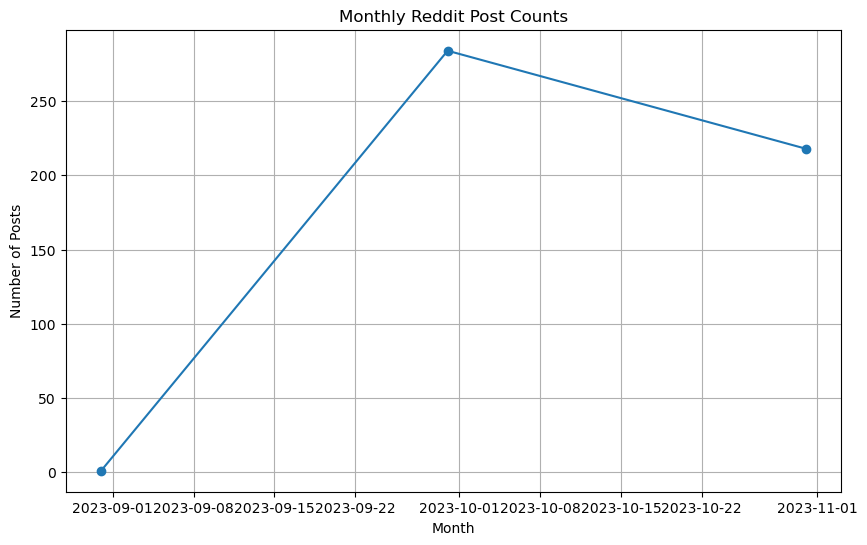

In [25]:
df.set_index('datetime', inplace=True)

# Group by month and count the number of posts
monthly_post_counts = df.resample('M').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_post_counts.index, monthly_post_counts.values, marker='o')
plt.title('Monthly Reddit Post Counts')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.grid()
plt.show()

In [26]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [27]:
df.head()

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-10-17 20:43:13           Jimmy Apple returns with news of Arrakis   
2023-10-17 12:17:59  After ChatGPT disruption, Stack Overflow lays ...   
2023-10-17 18:53:13  Baidu released Ernie 4.0, CEO Robin Li claims ...   
2023-10-17 20:26:16  Prompt crafting remains important. GPT-4 is fi...   

                                   author  score  Number of comments  \
datetime                                                               
2023-08-02 10:05:09        DnDNecromantic     67                   0   
2023-10-17 20:43:13           metalman123     99                  64   
2023-10-17 12:17:59             meowerguy    426                 107   
2023-10-17 18:53:13                czk_21     94                  30   
2023-10-17 20:26:16  BeginningInfluence55     64                  18   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-10-17 20:43:13                                                      
2023-10-17 12:17:59                                                      
2023-10-17 18:53:13                                                      
2023-10-17 20:26:16  \nIn case someone wants to play around with it...   

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-10-17 20:43:13  1.697575e+09         0.92   
2023-10-17 12:17:59  1.697545e+09         0.96   
2023-10-17 18:53:13  1.697569e+09         0.90   
2023-10-17 20:26:16  1.697574e+09         0.94   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-10-17 20:43:13  Okay boys I paid for it here are the screensho...   
2023-10-17 12:17:59  Remember when everyone said it was just a coin...   
2023-10-17 18:53:13  didnt find any technical specification just sh...   
2023-10-17 20:26:16  It was right by the way The animal in the imag...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-10-17 20:43:13           jimmy apple returns with news of arrakis   
2023-10-17 12:17:59  after chatgpt disruption stack overflow lays o...   
2023-10-17 18:53:13  baidu released ernie 40 ceo robin li claims th...   
2023-10-17 20:26:16  prompt crafting remains important gpt4 is fixe...   

                                                             Self Text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-10-17 20:43:13                                                      
2023-10-17 12:17:59                                                      
2023-10-17 18:53:13                                                      
2023-10-17 20:26:16  \nin case someone wants to play around with it...   

                                                          Top Comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-10-17 20:43:13  okay boys i paid for it here are the screensho...   
2023-10-17 12:17:59  remember when everyone said it was just a coin...   
2023-10-17 18:53:13  didnt find any technical specification just sh...   
2023-10-17 20:26:16  it was right by the way the animal in the imag...   

                                                       tokenized_title  \
datetime             

#### Cleaning results

In [28]:
from collections import Counter
import matplotlib.pyplot as plt
token_counter = Counter(token for tokens in df['tokenized_text'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'in': 558, 'case': 16, 'someone': 31, 'wants': 9, 'to': 1165, 'play': 7, 'around': 31, 'with': 315, 'it': 593, 'here': 31, 'is': 549, 'system': 21, 'prompt': 23, 'dont': 67, 'listen': 12, 'those': 35, 'crafting': 3, 'entrepreneurs': 1, 'that': 574, 'tell': 15, 'you': 336, 'make': 64, '3000': 2, 'a': 969, 'week': 5, 'their': 112, 'magic': 5, 'this': 325, 'all': 132, 'bullshit': 2, 'we': 308, 'have': 224, 'communities': 3, 'like': 162, 'one': 77, 'for': 348, 'stuff': 10, 'custom': 4, 'instruction': 5, 'always': 25, 'think': 100, 'step': 11, 'by': 124, 'try': 26, 'estimate': 1, 'if': 195, 'the': 1592, 'user': 14, 'terse': 3, 'or': 256, 'detailed': 5, 'answer': 13, 'never': 20, 'patronize': 1, 'teach': 2, 'them': 59, 'obvious': 5, 'too': 35, 'general': 30, 'things': 44, 'your': 139, 'answers': 13, 'depending': 2, 'on': 277, 'context': 15, 'assume': 14, 'has': 108, 'some': 96, 'knowledge': 17, 'about': 142, 'field': 9, 'structure': 6, 'sample': 2, 'below': 3, 'where': 68, 'put': 18, 'deter

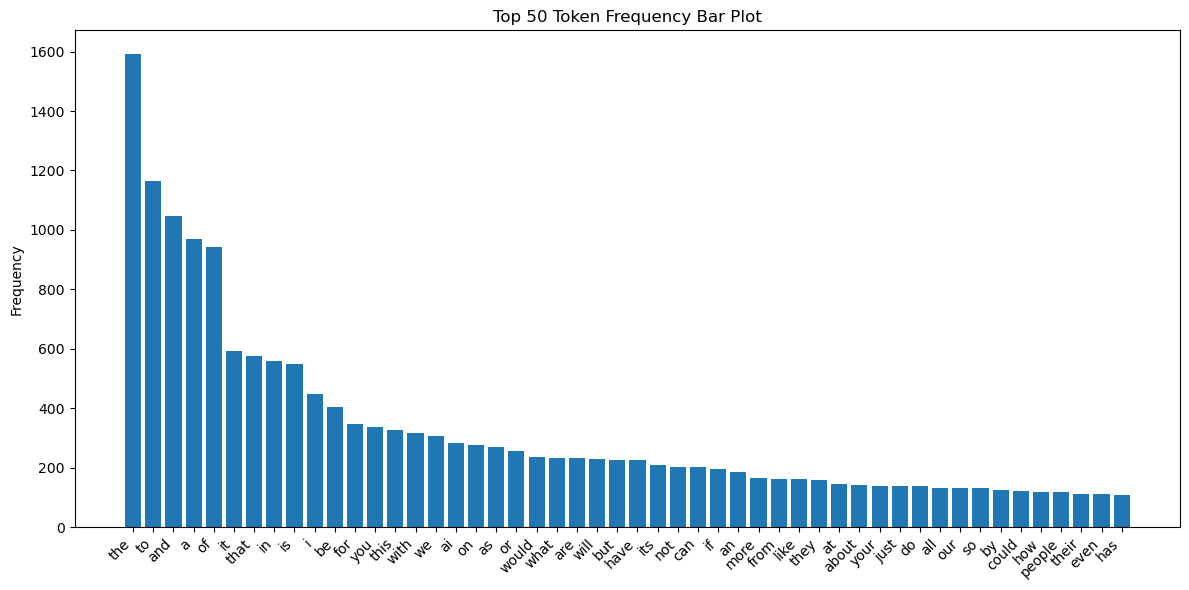

In [29]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [30]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_text_no_stopwords'] for token in tokens)
token_frequency = dict(token_counter)
print(token_frequency)

{'case': 16, 'someone': 31, 'wants': 9, 'play': 7, 'around': 31, 'system': 21, 'prompt': 23, 'dont': 67, 'listen': 12, 'crafting': 3, 'entrepreneurs': 1, 'tell': 15, 'make': 64, '3000': 2, 'week': 5, 'magic': 5, 'bullshit': 2, 'communities': 3, 'like': 162, 'one': 77, 'stuff': 10, 'custom': 4, 'instruction': 5, 'always': 25, 'think': 100, 'step': 11, 'try': 26, 'estimate': 1, 'user': 14, 'terse': 3, 'detailed': 5, 'answer': 13, 'never': 20, 'patronize': 1, 'teach': 2, 'obvious': 5, 'general': 30, 'things': 44, 'answers': 13, 'depending': 2, 'context': 15, 'assume': 14, 'knowledge': 17, 'field': 9, 'structure': 6, 'sample': 2, 'put': 18, 'detergant': 1, 'softener': 5, 'washing': 4, 'maschine': 1, 'identify': 1, 'users': 7, 'intention': 3, 'know': 76, 'add': 4, 'detergent': 6, 'fabric': 4, 'machine': 7, 'initial': 5, 'machines': 6, 'youll': 9, 'find': 25, 'two': 16, 'compartments': 1, 'adding': 3, 'typically': 1, 'goes': 6, 'main': 10, 'dispenser': 1, 'compartment': 3, 'separate': 8, 'do

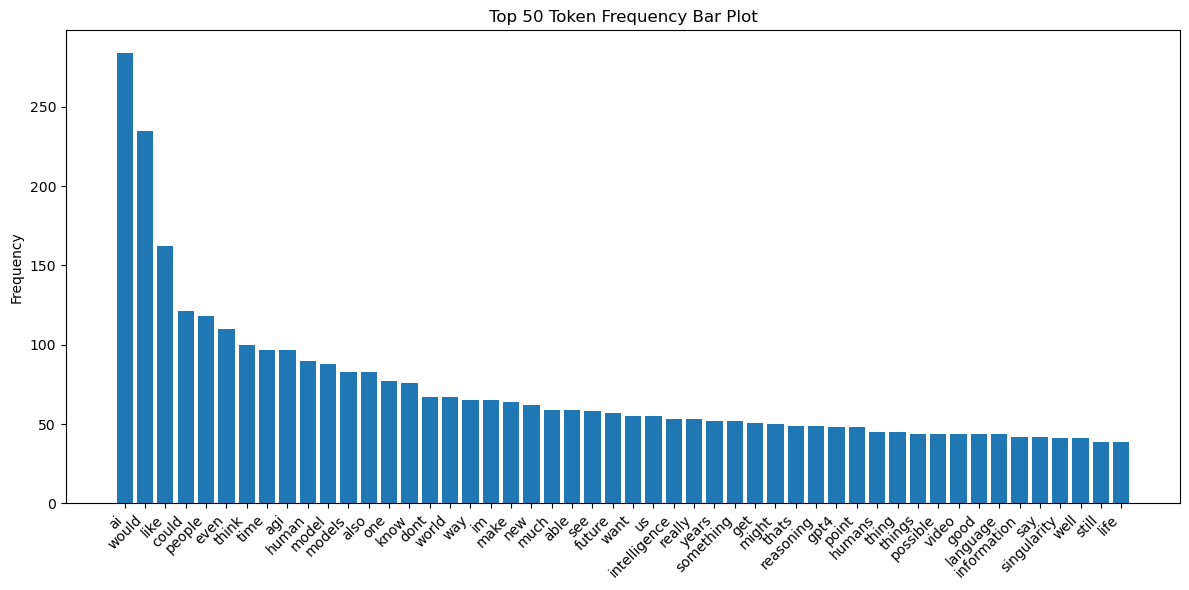

In [31]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [32]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_title'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'official': 2, 'rsingularity': 2, 'discord': 1, 'server': 1, 'link': 2, 'jimmy': 9, 'apple': 1, 'returns': 1, 'with': 68, 'news': 3, 'of': 154, 'arrakis': 3, 'after': 8, 'chatgpt': 13, 'disruption': 1, 'stack': 2, 'overflow': 1, 'lays': 1, 'off': 4, '28': 1, 'percent': 1, 'staff': 1, 'baidu': 2, 'released': 4, 'ernie': 1, '40': 1, 'ceo': 4, 'robin': 1, 'li': 1, 'claims': 2, 'their': 16, 'ai': 154, 'model': 30, 'is': 108, 'finally': 2, 'on': 51, 'par': 2, 'openais': 5, 'gpt4': 17, 'charlie': 1, 'dai': 1, 'vice': 1, 'president': 2, 'and': 147, 'research': 9, 'director': 1, 'technology': 7, 'at': 18, 'forresterwe': 1, 'still': 4, 'need': 6, 'more': 24, 'benchmarking': 1, 'evidence': 2, 'to': 176, 'prove': 1, 'it': 34, 'but': 10, 'im': 4, 'cautiously': 1, 'optimistic': 2, 'that': 51, 'this': 31, 'chinas': 1, 'moment': 1, 'prompt': 4, 'crafting': 1, 'remains': 1, 'important': 3, 'fixed': 2, 'in': 88, 'time': 13, 'so': 10, 'what': 39, 'for': 66, 'us': 9, 'thinking': 2, 'token': 2, 'count': 

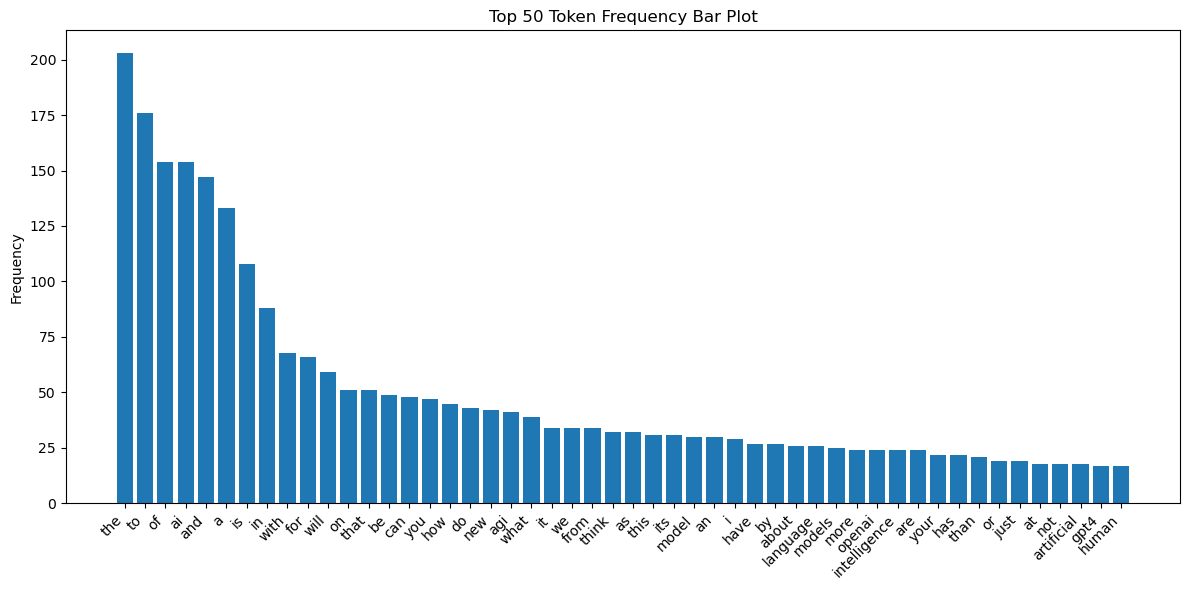

In [33]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [34]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_title_no_stopwords'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'official': 2, 'rsingularity': 2, 'discord': 1, 'server': 1, 'link': 2, 'jimmy': 9, 'apple': 1, 'returns': 1, 'news': 3, 'arrakis': 3, 'chatgpt': 13, 'disruption': 1, 'stack': 2, 'overflow': 1, 'lays': 1, '28': 1, 'percent': 1, 'staff': 1, 'baidu': 2, 'released': 4, 'ernie': 1, '40': 1, 'ceo': 4, 'robin': 1, 'li': 1, 'claims': 2, 'ai': 154, 'model': 30, 'finally': 2, 'par': 2, 'openais': 5, 'gpt4': 17, 'charlie': 1, 'dai': 1, 'vice': 1, 'president': 2, 'research': 9, 'director': 1, 'technology': 7, 'forresterwe': 1, 'still': 4, 'need': 6, 'benchmarking': 1, 'evidence': 2, 'prove': 1, 'im': 4, 'cautiously': 1, 'optimistic': 2, 'chinas': 1, 'moment': 1, 'prompt': 4, 'crafting': 1, 'remains': 1, 'important': 3, 'fixed': 2, 'time': 13, 'us': 9, 'thinking': 2, 'token': 2, 'count': 1, 'basically': 1, 'difference': 1, 'say': 4, 'something': 7, 'gut': 1, 'vs': 5, 'actively': 2, 'lucky': 1, 'alive': 2, 'paywall': 2, 'openai': 24, 'dropped': 2, 'work': 6, 'new': 42, 'rare': 1, 'setback': 1, 'ap

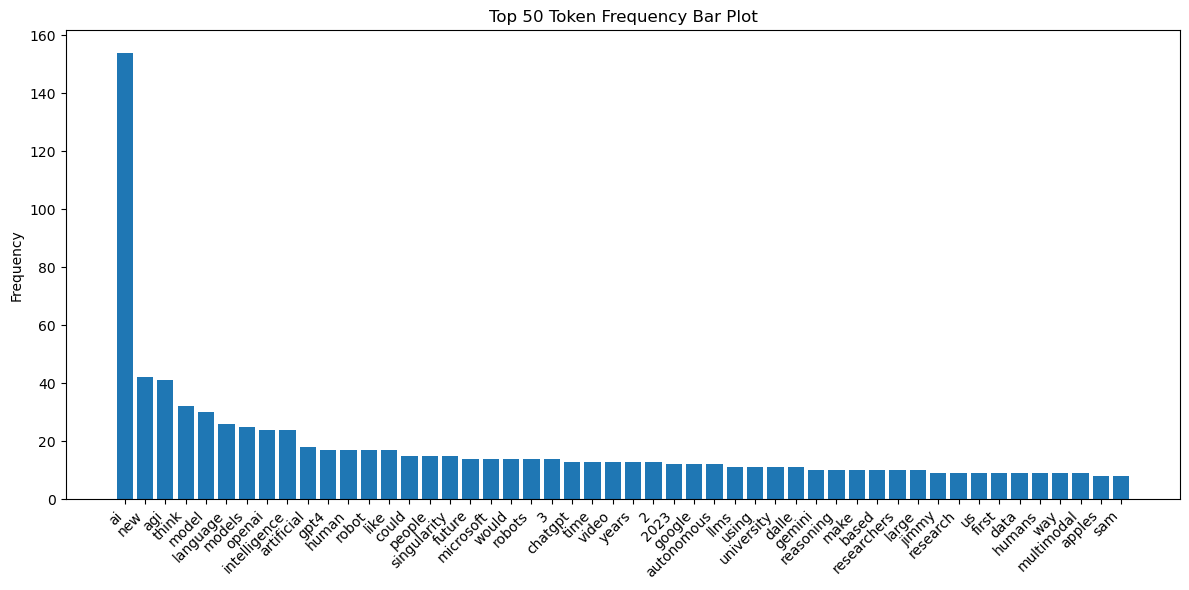

In [35]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))

top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [36]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_comments'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'okay': 12, 'boys': 4, 'i': 2299, 'paid': 9, 'for': 1642, 'it': 2850, 'here': 167, 'are': 1336, 'the': 7065, 'screenshots': 3, 'httpsxcomsidspodcast1status1714396049438015524s46tdvtgje78fcq9qlvfk7kopw': 1, 'those': 192, 'who': 272, 'cant': 203, 'see': 336, 'tweet': 17, 'its': 1089, 'just': 731, 'jimmy': 38, 'apples': 44, 'sharing': 9, 'this': 1575, 'article': 71, 'httpswwwtheinformationcomarticlesopenaidroppedworkonnewarrakisaimodelinraresetbackhttpswwwtheinformationcomarticlesopenaidroppedworkonnewarrakisaimodelinraresetback': 1, 'headline': 4, 'looks': 55, 'completely': 56, 'alien': 12, 'to': 5129, 'anyone': 76, 'hasnt': 22, 'been': 245, 'following': 18, 'ai': 1235, 'news': 45, 'lol': 65, 'httpspreviewreddit790dql7jttub1jpegwidth1170formatpjpgautowebpsda35ae1c679d8247a668be61c4425cd2f8346119': 1, 'and': 4016, 'there': 466, 'you': 1300, 'go': 159, 'turns': 9, 'out': 369, 'be': 1859, 'correct': 31, 'months': 57, 'after': 126, 'dropping': 2, 'name': 26, 'in': 2254, 'march': 7, 'can': 1

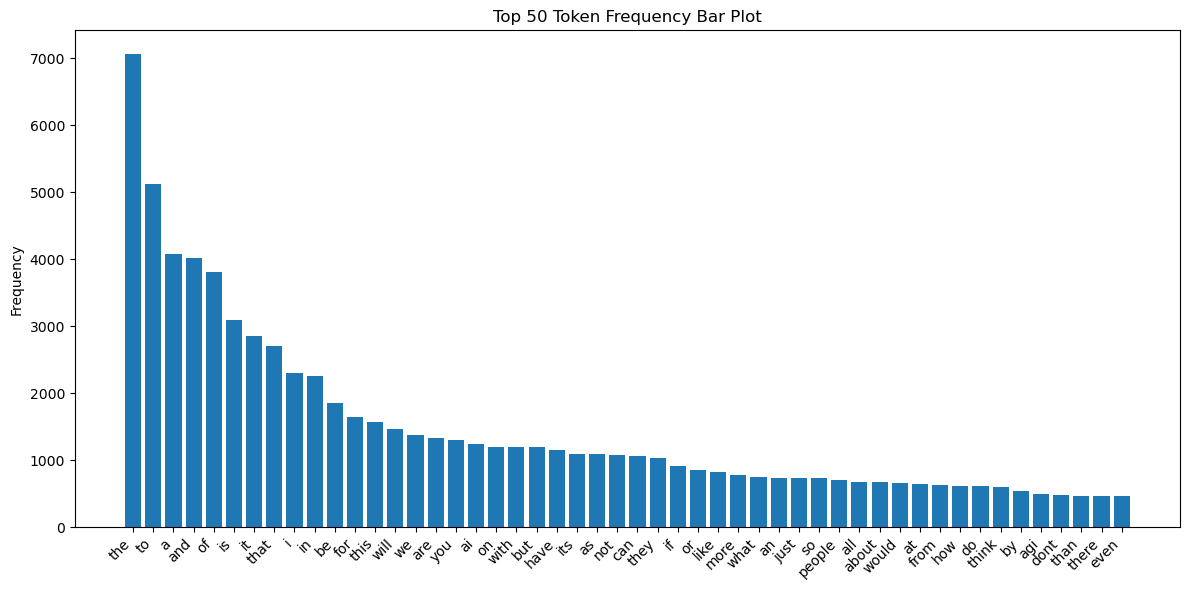

In [37]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [38]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_comments_no_stopwords'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'okay': 12, 'boys': 4, 'paid': 9, 'screenshots': 3, 'httpsxcomsidspodcast1status1714396049438015524s46tdvtgje78fcq9qlvfk7kopw': 1, 'cant': 203, 'see': 336, 'tweet': 17, 'jimmy': 38, 'apples': 44, 'sharing': 9, 'article': 71, 'httpswwwtheinformationcomarticlesopenaidroppedworkonnewarrakisaimodelinraresetbackhttpswwwtheinformationcomarticlesopenaidroppedworkonnewarrakisaimodelinraresetback': 1, 'headline': 4, 'looks': 55, 'completely': 56, 'alien': 12, 'anyone': 76, 'hasnt': 22, 'following': 18, 'ai': 1235, 'news': 45, 'lol': 65, 'httpspreviewreddit790dql7jttub1jpegwidth1170formatpjpgautowebpsda35ae1c679d8247a668be61c4425cd2f8346119': 1, 'go': 159, 'turns': 9, 'correct': 31, 'months': 57, 'dropping': 2, 'name': 26, 'march': 7, 'post': 75, 'actual': 49, 'messages': 3, 'please': 29, 'lot': 173, 'people': 699, 'dont': 472, 'twitter': 16, 'account': 16, 'protected': 5, 'say': 176, 'stuff': 104, 'arrakis': 22, 'saw': 20, 'information': 91, 'talking': 51, 'loop': 13, 'keep': 94, 'hearing': 5,

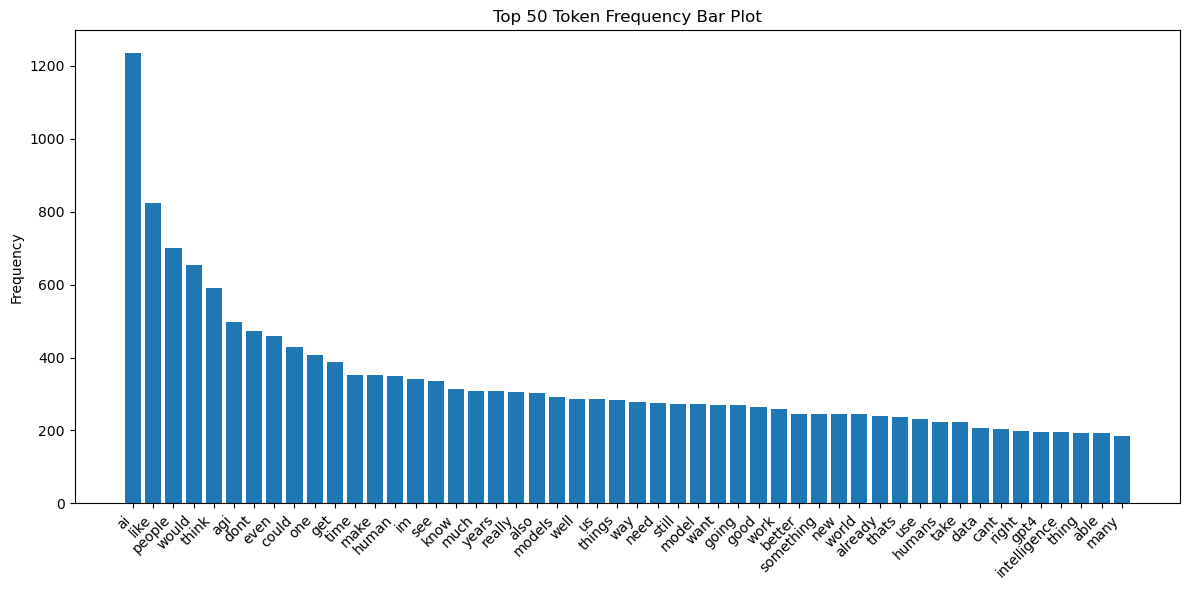

In [39]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))

top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

### Sentiment Analysis

In [29]:
#Initially i am defining the functions for calculating the number of positve and negative words and then finally computing the sentiment by subtracting the positive and negative count

In [40]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# load set of positive words
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)

# load set of negative words
lNegWords = []
with open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)

In [41]:
def computeSentiment(lTokens, setPosWords, setNegWords):
    posNum = len([tok for tok in lTokens if tok in setPosWords])
    negNum = len([tok for tok in lTokens if tok in setNegWords])
    sentiment = posNum - negNum
    return sentiment


In [42]:
from colorama import Fore, Back, Style
def printColouredTokens(lTokens, setPosWords, setNegWords, sentiment):
    for token in lTokens:
        if token in setPosWords:
            print(Fore.RED + token + ', ', end='')
        elif token in setNegWords:
            print(Fore.BLUE + token + ', ', end='')
        else:
            print(Style.RESET_ALL + token + ', ', end='')

    print(': {}'.format(sentiment))
    

##### Calculating the sentiment for post title 

In [43]:
for index, row in df.iterrows():
    text = row['tokenized_title_no_stopwords']
    sentiment = computeSentiment(text, setPosWords, setNegWords)

    printColouredTokens(text, setPosWords, setNegWords, sentiment)
    df.loc[index, 'sentiment_title'] = sentiment 

df.head()

official, rsingularity, discord, server, link, : -1
jimmy, apple, returns, news, arrakis, : 0
chatgpt, disruption, stack, overflow, lays, 28, percent, staff, : -1
baidu, released, ernie, 40, ceo, robin, li, claims, ai, model, finally, par, openais, gpt4, charlie, dai, vice, president, research, director, technology, forresterwe, still, need, benchmarking, evidence, prove, im, cautiously, optimistic, chinas, gpt4, moment, : 0
prompt, crafting, remains, important, gpt4, fixed, time, us, thinking, time, token, count, gpt4, basically, difference, say, something, gut, vs, actively, thinking, : 2
lucky, alive, : 1
paywall, openai, dropped, work, new, arrakis, ai, model, rare, setback, : 0
jimmy, apples, teasing, sam, altman, : 0
well, arrakis, confirmed, jimmy, apples, back, : 1
ai, predictions, 2023, 2026, : 0
two, gpt4, feature, announcements, seem, forgotten, still, released, long, term, memory, video, : 0
technooptimist, manifesto, infinite, job, growth, : 0
believe, artificial, intellig

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-10-17 20:43:13           Jimmy Apple returns with news of Arrakis   
2023-10-17 12:17:59  After ChatGPT disruption, Stack Overflow lays ...   
2023-10-17 18:53:13  Baidu released Ernie 4.0, CEO Robin Li claims ...   
2023-10-17 20:26:16  Prompt crafting remains important. GPT-4 is fi...   

                                   author  score  Number of comments  \
datetime                                                               
2023-08-02 10:05:09        DnDNecromantic     67                   0   
2023-10-17 20:43:13           metalman123     99                  64   
2023-10-17 12:17:59             meowerguy    426                 107   
2023-10-17 18:53:13                czk_21     94                  30   
2023-10-17 20:26:16  BeginningInfluence55     64                  18   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-10-17 20:43:13                                                      
2023-10-17 12:17:59                                                      
2023-10-17 18:53:13                                                      
2023-10-17 20:26:16  \nIn case someone wants to play around with it...   

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-10-17 20:43:13  1.697575e+09         0.92   
2023-10-17 12:17:59  1.697545e+09         0.96   
2023-10-17 18:53:13  1.697569e+09         0.90   
2023-10-17 20:26:16  1.697574e+09         0.94   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-10-17 20:43:13  Okay boys I paid for it here are the screensho...   
2023-10-17 12:17:59  Remember when everyone said it was just a coin...   
2023-10-17 18:53:13  didnt find any technical specification just sh...   
2023-10-17 20:26:16  It was right by the way The animal in the imag...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-10-17 20:43:13           jimmy apple returns with news of arrakis   
2023-10-17 12:17:59  after chatgpt disruption stack overflow lays o...   
2023-10-17 18:53:13  baidu released ernie 40 ceo robin li claims th...   
2023-10-17 20:26:16  prompt crafting remains important gpt4 is fixe...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-08-02 10:05:09                                                     ...   
2023-10-17 20:43:13                                                     ...   
2023-10-17 12:17:59                                                     ...   
2023-10-17 18:53:13                                                     ...   
2023-10-17 20:26:16  \nin case someone wants to play around with it...  ...   

                                                       tokenized_title  \
datetime                                                                 
2023-08-02 10:05:09    [official, rsingularity, discord, server, link]   
2023-10-17 20:43:13   [jimmy, apple, returns, with, news, of, arrakis]   
2023-10-17 12:17:59  [after, chatgpt, disruption, stack, overflow, ...   
2023-10-17 18:53:13  [baidu, released, ernie, 40, ceo, robin, li, c...   
2023-10-17 20:26:16  [prompt, crafting, remains, important, gpt4, i...   

                                                        toke

In [85]:
for index, row in df.iterrows():
    text = row['tokenized_title_no_stopwords']
    print(text)

['official', 'rsingularity', 'discord', 'server', 'link']
['created', 'video', 'entirely', 'cell', 'phone', 'minutes', 'using', 'new', 'heygen', 'video', 'translator', 'tool', 'dont', 'think', 'people', 'realize', 'quickly', 'profoundly', 'world', 'changing', 'ai']
['possibility', 'either', 'artificially', 'grown', 'organs', 'robotic', 'ones', 'lifetime']
['mathematician', 'philosopher', 'finds', 'chatgpt', '4', 'made', 'impressive', 'problemsolving', 'improvements', 'last', '4', 'months']
['united', 'nations', 'digital', 'strategy', 'presents', '4', 'possible', 'future', 'scenarios', 'following', '520', 'years', 'one', 'think', 'likely', 'happen', 'first']
['learning', 'programming', 'obsolete', '10', 'years', 'advancement', 'llms']
['transformers', 'revolutionized', 'ai', 'replace']
['foom']
['ready', 'ai', 'enters', 'workforce']
['ai', 'approaching', 'humancappabilities', 'faster', 'expected']
['lingo1', 'exploring', 'natural', 'language', 'autonomous', 'driving', 'wayve']
['r', 'la

In [44]:
df.head()

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-10-17 20:43:13           Jimmy Apple returns with news of Arrakis   
2023-10-17 12:17:59  After ChatGPT disruption, Stack Overflow lays ...   
2023-10-17 18:53:13  Baidu released Ernie 4.0, CEO Robin Li claims ...   
2023-10-17 20:26:16  Prompt crafting remains important. GPT-4 is fi...   

                                   author  score  Number of comments  \
datetime                                                               
2023-08-02 10:05:09        DnDNecromantic     67                   0   
2023-10-17 20:43:13           metalman123     99                  64   
2023-10-17 12:17:59             meowerguy    426                 107   
2023-10-17 18:53:13                czk_21     94                  30   
2023-10-17 20:26:16  BeginningInfluence55     64                  18   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-10-17 20:43:13                                                      
2023-10-17 12:17:59                                                      
2023-10-17 18:53:13                                                      
2023-10-17 20:26:16  \nIn case someone wants to play around with it...   

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-10-17 20:43:13  1.697575e+09         0.92   
2023-10-17 12:17:59  1.697545e+09         0.96   
2023-10-17 18:53:13  1.697569e+09         0.90   
2023-10-17 20:26:16  1.697574e+09         0.94   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-10-17 20:43:13  Okay boys I paid for it here are the screensho...   
2023-10-17 12:17:59  Remember when everyone said it was just a coin...   
2023-10-17 18:53:13  didnt find any technical specification just sh...   
2023-10-17 20:26:16  It was right by the way The animal in the imag...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-10-17 20:43:13           jimmy apple returns with news of arrakis   
2023-10-17 12:17:59  after chatgpt disruption stack overflow lays o...   
2023-10-17 18:53:13  baidu released ernie 40 ceo robin li claims th...   
2023-10-17 20:26:16  prompt crafting remains important gpt4 is fixe...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-08-02 10:05:09                                                     ...   
2023-10-17 20:43:13                                                     ...   
2023-10-17 12:17:59                                                     ...   
2023-10-17 18:53:13                                                     ...   
2023-10-17 20:26:16  \nin case someone wants to play around with it...  ...   

                                                       tokenized_title  \
datetime                                                                 
2023-08-02 10:05:09    [official, rsingularity, discord, server, link]   
2023-10-17 20:43:13   [jimmy, apple, returns, with, news, of, arrakis]   
2023-10-17 12:17:59  [after, chatgpt, disruption, stack, overflow, ...   
2023-10-17 18:53:13  [baidu, released, ernie, 40, ceo, robin, li, c...   
2023-10-17 20:26:16  [prompt, crafting, remains, important, gpt4, i...   

                                                        toke

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2023-08-02 10:05:09 to 2023-09-14 00:09:52
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   title                            503 non-null    object        
 1   author                           503 non-null    object        
 2   score                            503 non-null    int64         
 3   Number of comments               503 non-null    int64         
 4   self text                        503 non-null    object        
 5   timestamp                        503 non-null    float64       
 6   upvoteratio                      503 non-null    float64       
 7   comments                         503 non-null    object        
 8   Title                            503 non-null    object        
 9   Self Text                        503 non-null    object        
 10  Top Comments             

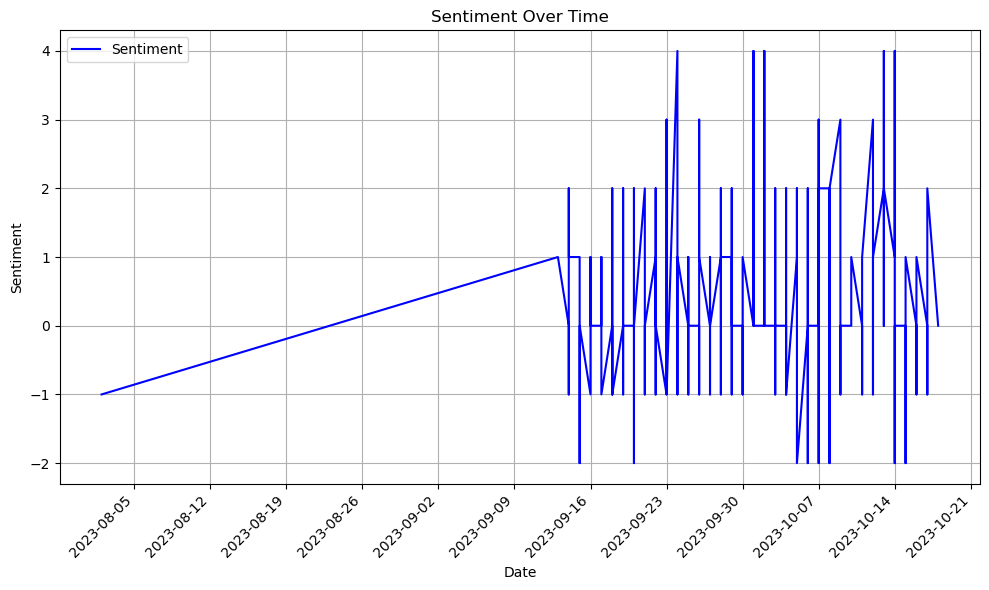

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = df.sort_values(by='date')
plt.figure(figsize=(10, 6))

# Plot the date using the 'date' column and set the sentiment on the y-axis
plt.plot(df['date'], df['sentiment_title'], color='b', label='Sentiment')

# Configure the x-axis to display the date range evenly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Display every 7 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


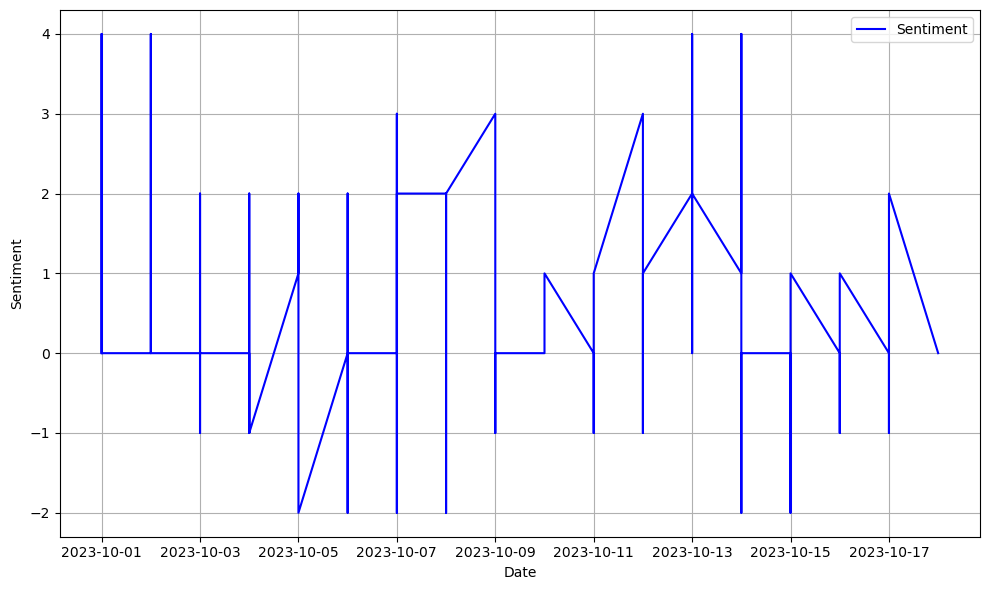

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with a 'date' column
# Convert the 'date' column to a datetime object (if not already)
df['date'] = pd.to_datetime(df['date'])

# Specify the month and year you want to plot
target_month = 10  # Replace with the month you want (e.g., 7 for July)

# Filter the DataFrame to include only data for the target month
target_data = df[df['date'].dt.month == target_month]

plt.figure(figsize=(10, 6))
plt.plot(target_data['date'], target_data['sentiment_title'], color='b', label='Sentiment')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##### Calculating the sentiment for the post content

In [48]:
for index, row in df.iterrows():
    text = row['tokenized_text_no_stopwords']
    sentiment = computeSentiment(text, setPosWords, setNegWords)
    printColouredTokens(text, setPosWords, setNegWords, sentiment)
    df.loc[index, 'sentiment'] = sentiment = sentiment


df.head()

: 0
: 0
heygens, new, feature, video, translation, revolutionizing, industry, allowing, translate, videos, language, high, accuracy, using, ai, httpswwwyoutubecomwatchvaacmqiijjs4httpswwwyoutubecomwatchvaacmqiijjs4, video, translation, feature, heygen, several, advantages, including, quick, video, translation, maintains, accurate, lip, sync, emotion, feature, help, content, resonate, globally, heygen, presently, supports, several, languages, including, american, english, spanish, french, hindi, italian, german, polish, portuguese, plans, expand, multilingual, support, future, heygens, video, translation, featurehttpswwwpopwebtoolscomblogvideotranslationheygen, excellent, tool, enhance, appeal, personal, business, projects, learn, feature, heygen, tools, visit, website, httpslabsheygencomhttpslabsheygencom, youre, interested, discovering, ai, tools, like, heygen, visit, popwebtools, ai, tools, directoryhttpswwwpopwebtoolscom, popwebtools, comprehensive, directory, ai, tools, help, save,

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-09-13 13:57:32  I created this video entirely on my cell phone...   
2023-09-14 08:12:46  Video Translation - Translate Your Videos Into...   
2023-09-14 22:03:30        Ultimate Question (surrounding AI and Jobs)   
2023-09-14 08:47:11  AI to strengthen Indian army with 4 legged rob...   

                                   author  score  Number of comments  \
datetime                                                               
2023-08-02 10:05:09        DnDNecromantic     67                   0   
2023-09-13 13:57:32           johngrady77    689                 124   
2023-09-14 08:12:46  GlumPresentation8144     18                  12   
2023-09-14 22:03:30   Serious-Cucumber-54     13                   7   
2023-09-14 08:47:11  Distinct-Question-16    207                 146   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32                                                      
2023-09-14 08:12:46  HeyGen's new feature, Video Translation, is re...   
2023-09-14 22:03:30  The ultimate question is whether AI will lower...   
2023-09-14 08:47:11  It's called MULE, and it's being showcased at ...   

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-09-13 13:57:32  1.694613e+09         0.97   
2023-09-14 08:12:46  1.694679e+09         0.82   
2023-09-14 22:03:30  1.694729e+09         0.85   
2023-09-14 08:47:11  1.694681e+09         0.86   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32  When this is real time or even within 5 second...   
2023-09-14 08:12:46  I could make an anime and then translate the v...   
2023-09-14 22:03:30  The COL should near directly reduce in paralle...   
2023-09-14 08:47:11  Its for low oxygen top mountains rough terrain...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-09-13 13:57:32  i created this video entirely on my cell phone...   
2023-09-14 08:12:46  video translation  translate your videos into ...   
2023-09-14 22:03:30          ultimate question surrounding ai and jobs   
2023-09-14 08:47:11  ai to strengthen indian army with 4 legged rob...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-08-02 10:05:09                                                     ...   
2023-09-13 13:57:32                                                     ...   
2023-09-14 08:12:46  heygens new feature video translation is revol...  ...   
2023-09-14 22:03:30  the ultimate question is whether ai will lower...  ...   
2023-09-14 08:47:11  its called mule and its being showcased at nor...  ...   

                                                        tokenized_text  \
datetime                                                                 
2023-08-02 10:05:09                                                 []   
2023-09-13 13:57:32                                                 []   
2023-09-14 08:12:46  [heygens, new, feature, video, translation, is...   
2023-09-14 22:03:30  [the, ultimate, question, is, whether, ai, wil...   
2023-09-14 08:47:11  [its, called, mule, and, its, being, showcased...   

                                                    tokenize

In [49]:
df.head()

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-09-13 13:57:32  I created this video entirely on my cell phone...   
2023-09-14 08:12:46  Video Translation - Translate Your Videos Into...   
2023-09-14 22:03:30        Ultimate Question (surrounding AI and Jobs)   
2023-09-14 08:47:11  AI to strengthen Indian army with 4 legged rob...   

                                   author  score  Number of comments  \
datetime                                                               
2023-08-02 10:05:09        DnDNecromantic     67                   0   
2023-09-13 13:57:32           johngrady77    689                 124   
2023-09-14 08:12:46  GlumPresentation8144     18                  12   
2023-09-14 22:03:30   Serious-Cucumber-54     13                   7   
2023-09-14 08:47:11  Distinct-Question-16    207                 146   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32                                                      
2023-09-14 08:12:46  HeyGen's new feature, Video Translation, is re...   
2023-09-14 22:03:30  The ultimate question is whether AI will lower...   
2023-09-14 08:47:11  It's called MULE, and it's being showcased at ...   

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-09-13 13:57:32  1.694613e+09         0.97   
2023-09-14 08:12:46  1.694679e+09         0.82   
2023-09-14 22:03:30  1.694729e+09         0.85   
2023-09-14 08:47:11  1.694681e+09         0.86   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32  When this is real time or even within 5 second...   
2023-09-14 08:12:46  I could make an anime and then translate the v...   
2023-09-14 22:03:30  The COL should near directly reduce in paralle...   
2023-09-14 08:47:11  Its for low oxygen top mountains rough terrain...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-09-13 13:57:32  i created this video entirely on my cell phone...   
2023-09-14 08:12:46  video translation  translate your videos into ...   
2023-09-14 22:03:30          ultimate question surrounding ai and jobs   
2023-09-14 08:47:11  ai to strengthen indian army with 4 legged rob...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-08-02 10:05:09                                                     ...   
2023-09-13 13:57:32                                                     ...   
2023-09-14 08:12:46  heygens new feature video translation is revol...  ...   
2023-09-14 22:03:30  the ultimate question is whether ai will lower...  ...   
2023-09-14 08:47:11  its called mule and its being showcased at nor...  ...   

                                                        tokenized_text  \
datetime                                                                 
2023-08-02 10:05:09                                                 []   
2023-09-13 13:57:32                                                 []   
2023-09-14 08:12:46  [heygens, new, feature, video, translation, is...   
2023-09-14 22:03:30  [the, ultimate, question, is, whether, ai, wil...   
2023-09-14 08:47:11  [its, called, mule, and, its, being, showcased...   

                                                    tokenize

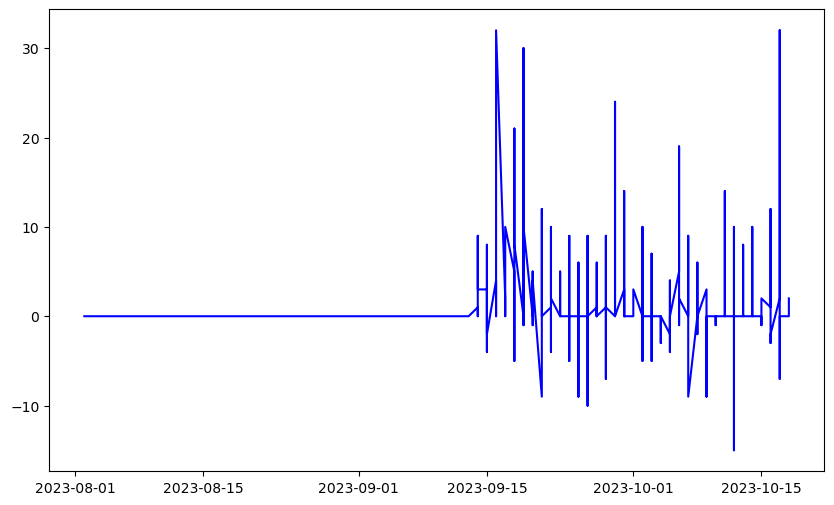

In [50]:
import matplotlib.pyplot as plt
df = df.sort_values(by='date')
plt.figure(figsize=(10, 6)) 
plt.plot(df['date'], df['sentiment'], color='b', label='Sentiment')

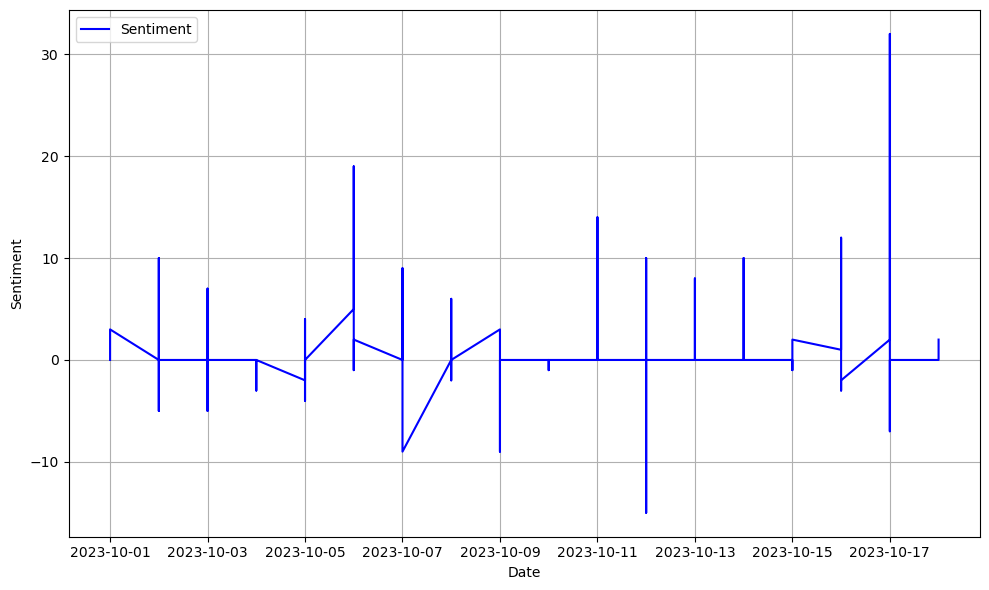

In [51]:
target_month = 10  # Replace with the month you want (e.g., 7 for July)

# Filter the DataFrame to include only data for the target month
target_data = df[df['date'].dt.month == target_month]

plt.figure(figsize=(10, 6))
plt.plot(target_data['date'], target_data['sentiment'], color='b', label='Sentiment')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Vader method

In [127]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def vaderPrintTokens(lTokens, dSentimentScores):

    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [128]:
def vaderSentimentAnalysis(postText, bPrint, tweetProcessor):

    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    lTokens = redditProcessor.process(postText)

    dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
    lSentiment.append(dSentimentScores)

    if bPrint:
        vaderPrintTokens(lTokens, dSentimentScores)
                
                    
    return lSentiment

In [129]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tweetTokenizer = TweetTokenizer()
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']


redditProcessor = RedditProcessing.RedditProcessing(tweetTokenizer, lStopwords)
for index, row in df.iterrows():
    text = row['title']
    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_title_vader'] = sentiment[0]['compound']


df.head()

Official r/singularity Discord server link [{'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4019}]
I created this video entirely on my cell phone, in just a few minutes, using the new HeyGen video translator tool. I don't think people realize how quickly and profoundly our world is changing because of AI. [{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.25}]
Possibility of either Artificially Grown Organs or Robotic ones in my lifetime? [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
Mathematician and Philosopher finds ChatGPT 4 has made impressive problem-solving improvements over the last 4 months. [{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6808}]
United Nations' Digital Strategy presents these 4 possible future scenarios for the following 5-20 years. Which one do you think is more likely to happen first? [{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4215}]
Will learning programming be obsolete in 10 years with the advancement in LLMs? [{

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-09-13 13:57:32  I created this video entirely on my cell phone...   
2023-09-14 03:43:09  Possibility of either Artificially Grown Organ...   
2023-09-14 20:40:08  Mathematician and Philosopher finds ChatGPT 4 ...   
2023-09-14 15:57:06  United Nations' Digital Strategy presents thes...   

                             author  score  Number of comments  \
datetime                                                         
2023-08-02 10:05:09  DnDNecromantic     67                   0   
2023-09-13 13:57:32     johngrady77    689                 124   
2023-09-14 03:43:09       Jacob3306     34                  82   
2023-09-14 20:40:08           Surur    281                 110   
2023-09-14 15:57:06     ATG-NNN-TGA    273                 127   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32                                                      
2023-09-14 03:43:09  Hey! Iv'e been wondering if in my lifetime (cu...   
2023-09-14 20:40:08                                                      
2023-09-14 15:57:06                                                      

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-09-13 13:57:32  1.694613e+09         0.97   
2023-09-14 03:43:09  1.694663e+09         0.82   
2023-09-14 20:40:08  1.694724e+09         0.80   
2023-09-14 15:57:06  1.694707e+09         0.95   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32  When this is real time or even within 5 second...   
2023-09-14 03:43:09  If the world doesnt destroy itself youll proba...   
2023-09-14 20:40:08  The site this is from httpsevolutionnewsorghtt...   
2023-09-14 15:57:06  Forgive me but the internet has made he jaded ...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-09-13 13:57:32  i created this video entirely on my cell phone...   
2023-09-14 03:43:09  possibility of either artificially grown organ...   
2023-09-14 20:40:08  mathematician and philosopher finds chatgpt 4 ...   
2023-09-14 15:57:06  united nations digital strategy presents these...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-08-02 10:05:09                                                     ...   
2023-09-13 13:57:32                                                     ...   
2023-09-14 03:43:09  hey ive been wondering if in my lifetime curre...  ...   
2023-09-14 20:40:08                                                     ...   
2023-09-14 15:57:06                                                     ...   

                                           tokenized_text_no_stopwords  \
datetime                                                                 
2023-08-02 10:05:09                                                 []   
2023-09-13 13:57:32                                                 []   
2023-09-14 03:43:09  [hey, ive, wondering, lifetime, currently, 16,...   
2023-09-14 20:40:08                                                 []   
2023-09-14 15:57:06                                                 []   

                                       tokenized_comments_no_stopwords  \
datetime                    

In [130]:
for index, row in df.iterrows():
    text = row['Self Text']

    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_text_vader'] = sentiment[0]['compound'] 

df.head()

 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
hey ive been wondering if in my lifetime currently 16 if lab grown or robotic organs will be able to replace normal ones to the degree that they are as good or even more efficient then normal biological ones 

i ask this mostly because i suffer from a condition called tetralogy of fallot mild but still makes me worry and i was wondering if you think that one day i could possible replace my heart and the surrounding area and even other organs with more efficient ones additionally could say replacing organs every 15  20 years massively extend the human lifespan  [{'neg': 0.092, 'neu': 0.761, 'pos': 0.147, 'compound': 0.4215}]
 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
this [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
i am new to this sub b

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-09-13 13:57:32  I created this video entirely on my cell phone...   
2023-09-14 03:43:09  Possibility of either Artificially Grown Organ...   
2023-09-14 20:40:08  Mathematician and Philosopher finds ChatGPT 4 ...   
2023-09-14 15:57:06  United Nations' Digital Strategy presents thes...   

                             author  score  Number of comments  \
datetime                                                         
2023-08-02 10:05:09  DnDNecromantic     67                   0   
2023-09-13 13:57:32     johngrady77    689                 124   
2023-09-14 03:43:09       Jacob3306     34                  82   
2023-09-14 20:40:08           Surur    281                 110   
2023-09-14 15:57:06     ATG-NNN-TGA    273                 127   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32                                                      
2023-09-14 03:43:09  Hey! Iv'e been wondering if in my lifetime (cu...   
2023-09-14 20:40:08                                                      
2023-09-14 15:57:06                                                      

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-09-13 13:57:32  1.694613e+09         0.97   
2023-09-14 03:43:09  1.694663e+09         0.82   
2023-09-14 20:40:08  1.694724e+09         0.80   
2023-09-14 15:57:06  1.694707e+09         0.95   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32  When this is real time or even within 5 second...   
2023-09-14 03:43:09  If the world doesnt destroy itself youll proba...   
2023-09-14 20:40:08  The site this is from httpsevolutionnewsorghtt...   
2023-09-14 15:57:06  Forgive me but the internet has made he jaded ...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-09-13 13:57:32  i created this video entirely on my cell phone...   
2023-09-14 03:43:09  possibility of either artificially grown organ...   
2023-09-14 20:40:08  mathematician and philosopher finds chatgpt 4 ...   
2023-09-14 15:57:06  united nations digital strategy presents these...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-08-02 10:05:09                                                     ...   
2023-09-13 13:57:32                                                     ...   
2023-09-14 03:43:09  hey ive been wondering if in my lifetime curre...  ...   
2023-09-14 20:40:08                                                     ...   
2023-09-14 15:57:06                                                     ...   

                                           tokenized_text_no_stopwords  \
datetime                                                                 
2023-08-02 10:05:09                                                 []   
2023-09-13 13:57:32                                                 []   
2023-09-14 03:43:09  [hey, ive, wondering, lifetime, currently, 16,...   
2023-09-14 20:40:08                                                 []   
2023-09-14 15:57:06                                                 []   

                                       tokenized_comments_no_stopwords  \
datetime                    

In [131]:
for index, row in df.iterrows():
    text = row['Top Comments']

    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_comm_vader'] = sentiment[0]['compound'] 

df.head()

 [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]
when this is real time or even within 5 seconds the world changes significantly probably less than a year already commented on this tech a while ago

youtube will at some point in the not too distant future apply this to all uploaded videos by default for the major languages and for users with a certain amount of subscribers massively boosting viewer figures and ad revenues to make youtube and content creators more money the tech doesnt need to be fast or realtime just profitable enough from increased ad revenue to cover the processing costs

the question is will netflix follow suit would they even be allowed to or would it be down to the individual movie and tv show producers to do this themselves

ill tell you what if the movie producers or distribution services dont quickly implement this then users will circulate countless illegal copies of translated media themselves and people will flock to it as theyre simply a better prod

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-09-13 13:57:32  I created this video entirely on my cell phone...   
2023-09-14 03:43:09  Possibility of either Artificially Grown Organ...   
2023-09-14 20:40:08  Mathematician and Philosopher finds ChatGPT 4 ...   
2023-09-14 15:57:06  United Nations' Digital Strategy presents thes...   

                             author  score  Number of comments  \
datetime                                                         
2023-08-02 10:05:09  DnDNecromantic     67                   0   
2023-09-13 13:57:32     johngrady77    689                 124   
2023-09-14 03:43:09       Jacob3306     34                  82   
2023-09-14 20:40:08           Surur    281                 110   
2023-09-14 15:57:06     ATG-NNN-TGA    273                 127   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32                                                      
2023-09-14 03:43:09  Hey! Iv'e been wondering if in my lifetime (cu...   
2023-09-14 20:40:08                                                      
2023-09-14 15:57:06                                                      

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-09-13 13:57:32  1.694613e+09         0.97   
2023-09-14 03:43:09  1.694663e+09         0.82   
2023-09-14 20:40:08  1.694724e+09         0.80   
2023-09-14 15:57:06  1.694707e+09         0.95   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32  When this is real time or even within 5 second...   
2023-09-14 03:43:09  If the world doesnt destroy itself youll proba...   
2023-09-14 20:40:08  The site this is from httpsevolutionnewsorghtt...   
2023-09-14 15:57:06  Forgive me but the internet has made he jaded ...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-09-13 13:57:32  i created this video entirely on my cell phone...   
2023-09-14 03:43:09  possibility of either artificially grown organ...   
2023-09-14 20:40:08  mathematician and philosopher finds chatgpt 4 ...   
2023-09-14 15:57:06  united nations digital strategy presents these...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-08-02 10:05:09                                                     ...   
2023-09-13 13:57:32                                                     ...   
2023-09-14 03:43:09  hey ive been wondering if in my lifetime curre...  ...   
2023-09-14 20:40:08                                                     ...   
2023-09-14 15:57:06                                                     ...   

                                           tokenized_text_no_stopwords  \
datetime                                                                 
2023-08-02 10:05:09                                                 []   
2023-09-13 13:57:32                                                 []   
2023-09-14 03:43:09  [hey, ive, wondering, lifetime, currently, 16,...   
2023-09-14 20:40:08                                                 []   
2023-09-14 15:57:06                                                 []   

                                       tokenized_comments_no_stopwords  \
datetime                    

In [132]:
df.head()

title  \
datetime                                                                 
2023-08-02 10:05:09         Official r/singularity Discord server link   
2023-09-13 13:57:32  I created this video entirely on my cell phone...   
2023-09-14 03:43:09  Possibility of either Artificially Grown Organ...   
2023-09-14 20:40:08  Mathematician and Philosopher finds ChatGPT 4 ...   
2023-09-14 15:57:06  United Nations' Digital Strategy presents thes...   

                             author  score  Number of comments  \
datetime                                                         
2023-08-02 10:05:09  DnDNecromantic     67                   0   
2023-09-13 13:57:32     johngrady77    689                 124   
2023-09-14 03:43:09       Jacob3306     34                  82   
2023-09-14 20:40:08           Surur    281                 110   
2023-09-14 15:57:06     ATG-NNN-TGA    273                 127   

                                                             self text  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32                                                      
2023-09-14 03:43:09  Hey! Iv'e been wondering if in my lifetime (cu...   
2023-09-14 20:40:08                                                      
2023-09-14 15:57:06                                                      

                        timestamp  upvoteratio  \
datetime                                         
2023-08-02 10:05:09  1.690971e+09         0.94   
2023-09-13 13:57:32  1.694613e+09         0.97   
2023-09-14 03:43:09  1.694663e+09         0.82   
2023-09-14 20:40:08  1.694724e+09         0.80   
2023-09-14 15:57:06  1.694707e+09         0.95   

                                                              comments  \
datetime                                                                 
2023-08-02 10:05:09                                                      
2023-09-13 13:57:32  When this is real time or even within 5 second...   
2023-09-14 03:43:09  If the world doesnt destroy itself youll proba...   
2023-09-14 20:40:08  The site this is from httpsevolutionnewsorghtt...   
2023-09-14 15:57:06  Forgive me but the internet has made he jaded ...   

                                                                 Title  \
datetime                                                                 
2023-08-02 10:05:09          official rsingularity discord server link   
2023-09-13 13:57:32  i created this video entirely on my cell phone...   
2023-09-14 03:43:09  possibility of either artificially grown organ...   
2023-09-14 20:40:08  mathematician and philosopher finds chatgpt 4 ...   
2023-09-14 15:57:06  united nations digital strategy presents these...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-08-02 10:05:09                                                     ...   
2023-09-13 13:57:32                                                     ...   
2023-09-14 03:43:09  hey ive been wondering if in my lifetime curre...  ...   
2023-09-14 20:40:08                                                     ...   
2023-09-14 15:57:06                                                     ...   

                                           tokenized_text_no_stopwords  \
datetime                                                                 
2023-08-02 10:05:09                                                 []   
2023-09-13 13:57:32                                                 []   
2023-09-14 03:43:09  [hey, ive, wondering, lifetime, currently, 16,...   
2023-09-14 20:40:08                                                 []   
2023-09-14 15:57:06                                                 []   

                                       tokenized_comments_no_stopwords  \
datetime                    

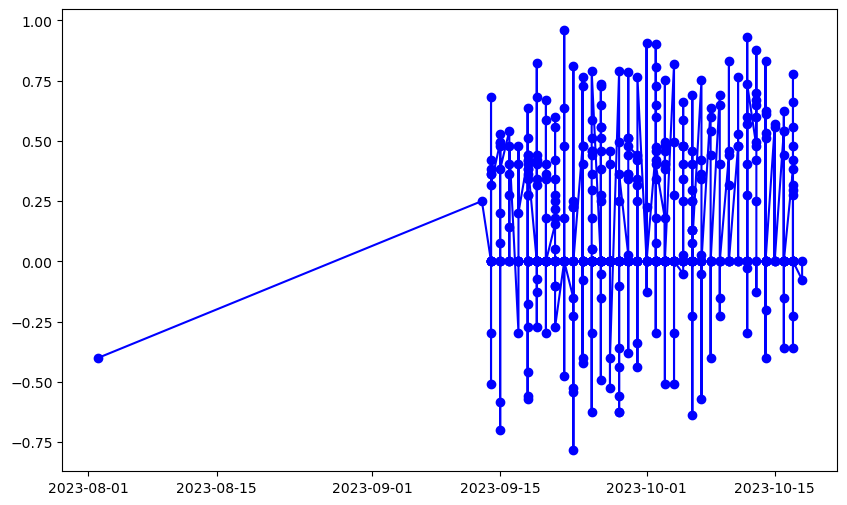

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sentiment_title_vader'], marker='o', linestyle='-', color='b', label='Sentiment')


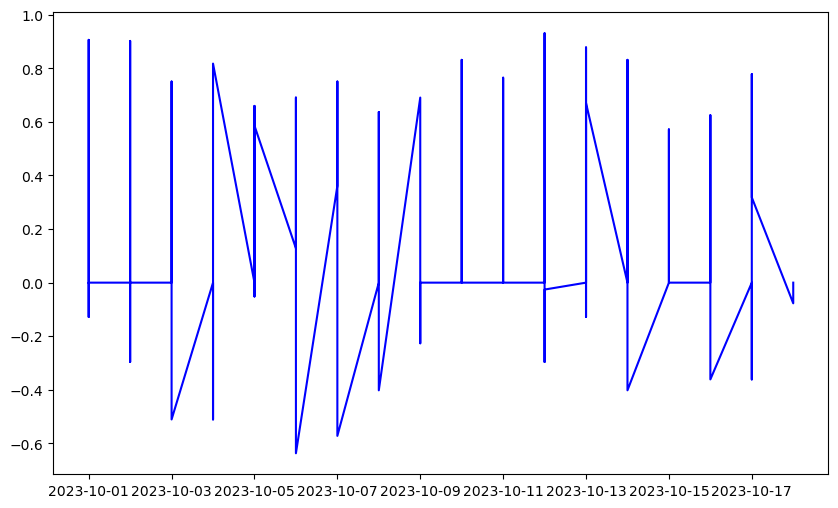

In [134]:
df_2023 = df[df['datetime'].dt.year == 2023]
month = [10]
df_02_2023 = df_2023[df_2023['datetime'].dt.month.isin(month)]
df_02_2023 = df_02_2023.sort_values(by='date')
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_02_2023['date'], df_02_2023['sentiment_title_vader'], color='b', label='Sentiment')

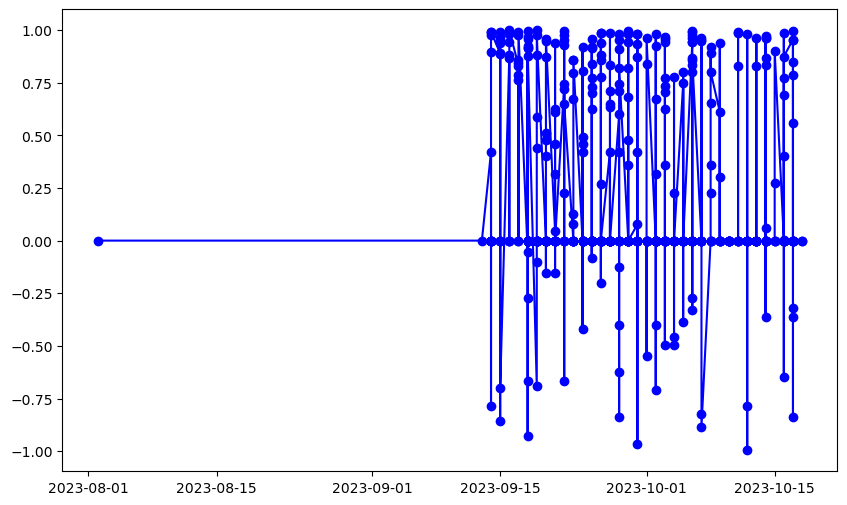

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sentiment_text_vader'], marker='o', linestyle='-', color='b', label='Sentiment')

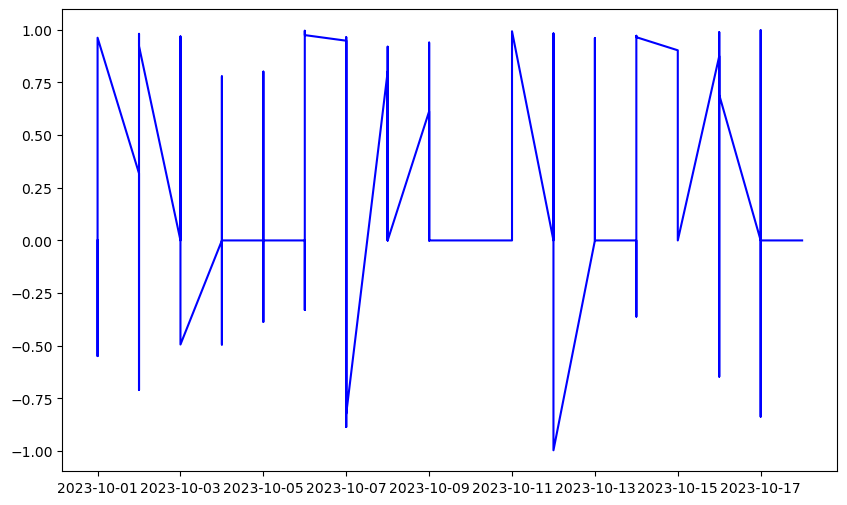

In [136]:
df_2023 = df[df['datetime'].dt.year == 2023]
month = [10]
df_02_2023 = df_2023[df_2023['datetime'].dt.month.isin(month)]
df_02_2023 = df_02_2023.sort_values(by='date')
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_02_2023['date'], df_02_2023['sentiment_text_vader'], color='b', label='Sentiment')

In [137]:
df_2023 = df[(df['datetime'].dt.year == 2023) & (df['datetime'].dt.month == 10) & (df['datetime'].dt.day == 12)]
df_2023

title  \
datetime                                                                 
2023-10-12 02:20:55  Pi AI has up to date information. Does anyone ...   
2023-10-12 04:52:35  Groundbreaking achievement as bionic hand merg...   
2023-10-12 02:41:55  I think about Human-AGI relationships like in ...   
2023-10-12 07:48:56  LLMs can’t self-correct in reasoning tasks, De...   
2023-10-12 01:51:47  OpenAI is actively preventing a proto-AGI thin...   
2023-10-12 15:58:50         AI just got 100-fold more energy efficient   
2023-10-12 11:41:56  What are these supposed “Risks” created by AI ...   
2023-10-12 16:14:19  OpenAI plans major updates to lure developers ...   
2023-10-12 19:41:05  Google’s AI-powered search experience can now ...   
2023-10-12 19:15:36       OpenAI has quietly changed its ‘core values’   
2023-10-12 23:03:23  Do you consider that OpenAI might have achieve...   
2023-10-12 21:18:36  China developed Jiuzhang 3.0, a quantum comput...   
2023-10-12 18:35:20  Artificial intelligence and the future of huma...   

                                   author  score  Number of comments  \
datetime                                                               
2023-10-12 02:20:55            DragonForg    191                  73   
2023-10-12 04:52:35      Melodic-Work7436    330                  36   
2023-10-12 02:41:55  BeginningInfluence55    116                 114   
2023-10-12 07:48:56  Routine_Complaint_79     47                  61   
2023-10-12 01:51:47  BeginningInfluence55    145                 116   
2023-10-12 15:58:50         MassiveWasabi    266                  53   
2023-10-12 11:41:56            BigZaddyZ3      8                  73   
2023-10-12 16:14:19           Gagarin1961    161                  39   
2023-10-12 19:41:05       ImInTheAudience     98                  37   
2023-10-12 19:15:36            hydraofwar    256                 105   
2023-10-12 23:03:23                Cr4zko    163                 218   
2023-10-12 21:18:36        Dr_Singularity    873                 188   
2023-10-12 18:35:20            Tao_Dragon     93                  13   

                                                             self text  \
datetime                                                                 
2023-10-12 02:20:55                                                      
2023-10-12 04:52:35                                                      
2023-10-12 02:41:55  [this is some highly speculative showerthought...   
2023-10-12 07:48:56                                                      
2023-10-12 01:51:47               Would it be too overpowered or what?   
2023-10-12 15:58:50                                                      
2023-10-12 11:41:56  This question is really more of a continuation...   
2023-10-12 16:14:19                                                      
2023-10-12 19:41:05                                                      
2023-10-12 19:15:36  https://www.semafor.com/article/10/12/2023/ope...   
2023-10-12 23:03:23  I mean, forget the bullshit 'leaks' we've gott...   
2023-10-12 21:18:36                                                      
2023-10-12 18:35:20                                                      

                        timestamp  upvoteratio  \
datetime                                         
2023-10-12 02:20:55  1.697077e+09         0.92   
2023-10-12 04:52:35  1.697086e+09         0.99   
2023-10-12 02:41:55  1.697079e+09         0.86   
2023-10-12 07:48:56  1.697097e+09         0.78   
2023-10-12 01:51:47  1.697076e+09         0.82   
2023-10-12 15:58:50  1.697126e+09         0.91   
2023-10-12 11:41:56  1.697111e+09         0.60   
2023-10-12 16:14:19  1.697127e+09         0.97   
2023-10-12 19:41:05  1.697140e+09         0.96   
2023-10-12 19:15:36  1.697138e+09         0.96   
2023-10-12 23:03:23  1.697152e+09         0.81   
2023-10-12 21:18:36  1.697146e+09         0.92   
2023-10-12 18:35:20  1.697136e+09         0.94   

           

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2023-08-02 10:05:09 to 2023-10-18 01:43:09
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   title                            503 non-null    object        
 1   author                           503 non-null    object        
 2   score                            503 non-null    int64         
 3   Number of comments               503 non-null    int64         
 4   self text                        503 non-null    object        
 5   timestamp                        503 non-null    float64       
 6   upvoteratio                      503 non-null    float64       
 7   comments                         503 non-null    object        
 8   Title                            503 non-null    object        
 9   Self Text                        503 non-null    object        
 10  Top Comments             

In [137]:
df_2023 = df[(df['datetime'].dt.year == 2023) & (df['datetime'].dt.month == 10) & (df['datetime'].dt.day == 16)]
print("title:",df_2023.loc['2023-10-16 01:34:30']['Title'],"\ndate:",df_2023.loc['2023-10-16 01:34:30']['date'],"\nsentiment vader:",df_2023.loc['2023-10-16 01:34:30']["sentiment_title_vader"])


title: how do you deal with employers writing you up and out 
date: 2023-10-16 00:00:00 
sentiment vader: 0.0


In [138]:
df_2023.loc['2023-10-16 01:34:30']

Title                              how do you deal with employers writing you up ...
Author                                                                DonkeySmash101
Score                                                                              1
Number of Comments                                                                 1
URL                                https://www.reddit.com/r/jobs/comments/178ummc...
Self Text                          ive come back from a short term disability lea...
Timestamp                                                               1697420070.0
upvoteration                                                                     1.0
Top Comments                       they are professionally managing you out the d...
tokenized_title                    [how, do, you, deal, with, employers, writing,...
tokenized_text                     [ive, come, back, from, a, short, term, disabi...
tokenized_comments                 [they, are, professionally, ma

In [171]:
df.head()

title                author  \
1  After ChatGPT disruption, Stack Overflow lays ...             meowerguy   
2                         How very lucky to be alive                Stack3   
3  Baidu released Ernie 4.0, CEO Robin Li claims ...                czk_21   
4  Prompt crafting remains important. GPT-4 is fi...  BeginningInfluence55   
5           Jimmy Apple returns with news of Arrakis           metalman123   

   score  Number of comments  \
1    311                  97   
2    155                 118   
3     64                  20   
4     36                  16   
5     31                  49   

                                           self text     timestamp  \
1                                                     1.697545e+09   
2  I've always thought it was weird that I find m...  1.697552e+09   
3                                                     1.697569e+09   
4  \nIn case someone wants to play around with it...  1.697574e+09   
5                                                     1.697575e+09   

   upvoteratio                                           comments  \
1         0.95  Remember when everyone said it was just a coin...   
2         0.85                        Almost too lucky. Very sus.   
3         0.88  didnt find any technical specification, just s...   
4         0.94  It was right by the way. The animal in the ima...   
5         0.86  Okay boys I paid for it, here are the screensh...   

                                               Title  \
1  after chatgpt disruption stack overflow lays o...   
2                         how very lucky to be alive   
3  baidu released ernie 40 ceo robin li claims th...   
4  prompt crafting remains important gpt4 is fixe...   
5           jimmy apple returns with news of arrakis   

                                           Self Text  \
1                                                      
2  ive always thought it was weird that i find my...   
3                                                      
4  \nin case someone wants to play around with it...   
5                                                      

                                        Top Comments  \
1  remember when everyone said it was just a coin...   
2                        almost too lucky. very sus.   
3  didnt find any technical specification, just s...   
4  it was right by the way. the animal in the ima...   
5  okay boys i paid for it, here are the screensh...   

                                     tokenized_title  \
1  [after, chatgpt, disruption, stack, overflow, ...   
2                  [how, very, lucky, to, be, alive]   
3  [baidu, released, ernie, 40, ceo, robin, li, c...   
4  [prompt, crafting, remains, important, gpt4, i...   
5   [jimmy, apple, returns, with, news, of, arrakis]   

                                      tokenized_text  \
1                                                 []   
2  [ive, always, thought, it, was, weird, that, i...   
3                                                 []   
4  [in, case, someone, wants, to, play, around, w...   
5                                                 []   

                                  tokenized_comments  \
1  [remember, when, everyone, said, it, was, just...   
2              [almost, too, lucky, ., very, sus, .]   
3  [didnt, find, any, technical, specification, ,...   
4  [it, was, right, by, the, way, ., the, animal,...   
5  [okay, boys, i, paid, for, it, ,, here, are, t...   

                        tokenized_title_no_stopwords  \
1  [chatgpt, disruption, stack, overflow, lays, 2...   
2                                     [lucky, alive]   
3  [baidu, released, ernie, 40, ceo, robin, li, c...   
4  [prompt, crafting, remains, important, gpt4, f...   
5             [jimmy, apple, returns, news, arrakis]   

                         tokenized_text_no_stopwords  \
1                                                 []   
2  [ive, always, thought, weird, find, existing, ...   
3                     

###  Top negative and top positive

In [64]:
top_negative_value = df['sentiment_title_vader'].min()


In [65]:
row_with_top_negative_value = df[df['sentiment_title_vader'] == df['sentiment_title_vader'].min()]
row_with_top_negative_value

title  \
datetime                                                                 
2023-09-23 13:10:50  Project Gutenberg has implemented one of the w...   

                           author  score  Number of comments self text  \
datetime                                                                 
2023-09-23 13:10:50  esmeromantic     88                 180             

                        timestamp  upvoteratio comments  \
datetime                                                  
2023-09-23 13:10:50  1.695475e+09         0.73            

                                                                 Title  \
datetime                                                                 
2023-09-23 13:10:50  project gutenberg has implemented one of the w...   

                    Self Text  ...  \
datetime                       ...   
2023-09-23 13:10:50            ...   

                                          tokenized_title_no_stopwords  \
datetime                                                                 
2023-09-23 13:10:50  [project, gutenberg, implemented, one, worst, ...   

                    tokenized_text_no_stopwords  \
datetime                                          
2023-09-23 13:10:50                          []   

                    tokenized_comments_no_stopwords       date      time  \
datetime                                                                   
2023-09-23 13:10:50                              [] 2023-09-23  13:10:50   

                               datetime sentiment_title sentiment  \
datetime                                                            
2023-09-23 13:10:50 2023-09-23 13:10:50            -1.0       0.0   

                    sentiment_title_vader sentiment_text_vader  
datetime                                                        
2023-09-23 13:10:50               -0.7845                  0.0  

[1 rows x 24 columns]

In [68]:
print("title:",row_with_top_negative_value.loc['2023-09-23 13:10:50']['Title'],"\ndate:",row_with_top_negative_value.loc['2023-09-23 13:10:50']['date'],"\nsentiment vader:",row_with_top_negative_value.loc['2023-09-23 13:10:50']["sentiment_title_vader"])
print("upvoteratio:",row_with_top_negative_value.loc['2023-09-23 13:10:50']['upvoteratio'],"\nscore:",row_with_top_negative_value.loc['2023-09-23 13:10:50']['score'])

title: project gutenberg has implemented one of the worst ai fears of striking actors 
date: 2023-09-23 00:00:00 
sentiment vader: -0.7845
upvoteratio: 0.73 
score: 88


### Topic modelling

In [56]:
import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [57]:
lPosts = []
for j in df['tokenized_title_no_stopwords']:
    lPosts.append(' '.join(j))

In [58]:
lPosts

['official rsingularity discord server link',
 'created video entirely cell phone minutes using new heygen video translator tool dont think people realize quickly profoundly world changing ai',
 'possibility either artificially grown organs robotic ones lifetime',
 'mathematician philosopher finds chatgpt 4 made impressive problemsolving improvements last 4 months',
 'united nations digital strategy presents 4 possible future scenarios following 520 years one think likely happen first',
 'learning programming obsolete 10 years advancement llms',
 'transformers revolutionized ai replace',
 'foom',
 'ready ai enters workforce',
 'ai approaching humancappabilities faster expected',
 'lingo1 exploring natural language autonomous driving wayve',
 'r large language models compiler optimization metaai 2023 autotuner needs 949 cpudays achive nearly approach 1shot',
 'ai strengthen indian army 4 legged robot 12kg load cap walk snow rocks run even fire enemies',
 'ultimate question surrounding a

In [59]:
topicNum = 3
wordNumToDisplay = 3
featureNum = 1500

In [60]:
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
tfFeatureNames = tfVectorizer.get_feature_names_out()
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [61]:
def display_topics(model, featureNames, numTopWords):
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [62]:
wordNumToDisplay

3

In [63]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
language intelligence models
Topic 1:
ai model new
Topic 2:
ai agi openai


In [76]:
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

C:\Users\ANJANA\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


#### Filtering dataframe based on keywords

In [145]:
# Define a list of keywords related to job displacement due to AI
keywords = ["job","displacement", "job loss", "automation impact"]

# Filter the DataFrame based on the keywords
filtered_df = df[df['title'].str.contains('|'.join(keywords), case=False) | df['self text'].str.contains('|'.join(keywords), case=False)]

# Show the filtered DataFrame
print(filtered_df)




                                                                 title  \
datetime                                                                 
2023-09-14 22:03:30        Ultimate Question (surrounding AI and Jobs)   
2023-09-16 16:39:41  Watching Westworld and I think it covers some ...   
2023-09-16 18:47:05       Has anyone had this peculiar feeling lately?   
2023-09-18 22:27:49  AGI is not human-level reasoning (but that's s...   
2023-09-18 19:19:11  Announcing RoboFab, World's First Factory for ...   
2023-09-18 22:00:43           What I hope to see from AI in five years   
2023-09-19 20:20:18  Nearly half of CEOs believe AI could replace t...   
2023-09-20 22:45:54  Is the end of artists who make money off of this?   
2023-09-24 20:32:10  Driverless trucks would actually be better yet...   
2023-09-26 18:28:37  Microsoft is planning to use nuclear energy to...   
2023-09-27 12:13:49  Will general purpose AI ever have enough compu...   
2023-09-28 01:36:45              The w

In [78]:
filtered_df.head()

title  \
datetime                                                                 
2023-09-14 22:03:30        Ultimate Question (surrounding AI and Jobs)   
2023-09-16 16:39:41  Watching Westworld and I think it covers some ...   
2023-09-16 18:47:05       Has anyone had this peculiar feeling lately?   
2023-09-18 22:27:49  AGI is not human-level reasoning (but that's s...   
2023-09-18 19:19:11  Announcing RoboFab, World's First Factory for ...   

                                  author  score  Number of comments  \
datetime                                                              
2023-09-14 22:03:30  Serious-Cucumber-54     13                   7   
2023-09-16 16:39:41                Arowx      5                  14   
2023-09-16 18:47:05            Maskofman    283                 206   
2023-09-18 22:27:49     outerspaceisalie      7                  41   
2023-09-18 19:19:11                Tkins     46                  12   

                                                             self text  \
datetime                                                                 
2023-09-14 22:03:30  The ultimate question is whether AI will lower...   
2023-09-16 16:39:41  What fictional works do you think raise the mo...   
2023-09-16 18:47:05  Lately, I've been grappling with a feeling tha...   
2023-09-18 22:27:49  AGI  is any computer system that that can rely...   
2023-09-18 19:19:11  I wonder what the price point is for digit? If...   

                        timestamp  upvoteratio  \
datetime                                         
2023-09-14 22:03:30  1.694729e+09         0.85   
2023-09-16 16:39:41  1.694882e+09         0.58   
2023-09-16 18:47:05  1.694890e+09         0.88   
2023-09-18 22:27:49  1.695076e+09         0.65   
2023-09-18 19:19:11  1.695065e+09         0.96   

                                                              comments  \
datetime                                                                 
2023-09-14 22:03:30  The COL should near directly reduce in paralle...   
2023-09-16 16:39:41  IMO we should focus on intelligence augmentati...   
2023-09-16 18:47:05  I think this feeling is a normal part of the h...   
2023-09-18 22:27:49  A lot of humans are incapable of the types of ...   
2023-09-18 19:19:11  Slay our RoboFab queen\n\nAs is tradition the ...   

                                                                 Title  \
datetime                                                                 
2023-09-14 22:03:30          ultimate question surrounding ai and jobs   
2023-09-16 16:39:41  watching westworld and i think it covers some ...   
2023-09-16 18:47:05        has anyone had this peculiar feeling lately   
2023-09-18 22:27:49  agi is not humanlevel reasoning but thats stil...   
2023-09-18 19:19:11  announcing robofab worlds first factory for hu...   

                                                             Self Text  ...  \
datetime                                                                ...   
2023-09-14 22:03:30  the ultimate question is whether ai will lower...  ...   
2023-09-16 16:39:41  what fictional works do you think raise the mo...  ...   
2023-09-16 18:47:05  lately ive been grappling with a feeling thats...  ...   
2023-09-18 22:27:49  agi  is any computer system that that can rely...  ...   
2023-09-18 19:19:11  i wonder what the price point is for digit if ...  ...   

                                                        tokenized_text  \
datetime                                                                 
2023-09-14 22:03:30  [the, ultimate, question, is, whether, ai, wil...   
2023-09-16 16:39:41  [what, fictional, works, do, you, think, raise...   
2023-09-16 18:47:05  [lately, ive, been, grappling, with, a, feelin...   
2023-09-18 22:27:49  [agi, is, any, computer, system, that, that, c...   
2023-09-18 19:19:11  [i, wonder, what, the, price, point, is, for, ...   

                                                    tokenized_comme

In [93]:
filtered_df.loc['2023-10-09 16:06:02']

title                              AI is replacing customer service jobs across t...
author                                                          SharpCartographer831
score                                                                            489
Number of comments                                                               242
self text                                                                           
timestamp                                                               1696867562.0
upvoteratio                                                                     0.97
comments                           I hope I never have to work a customer service...
Title                              ai is replacing customer service jobs across t...
Self Text                                                                           
Top Comments                       i hope i never have to work a customer service...
tokenized_title                    [ai, is, replacing, customer, 

In [81]:
text = filtered_df.loc['2023-10-09 16:06:02']['tokenized_title_no_stopwords']
sentiment = computeSentiment(text, setPosWords, setNegWords)
printColouredTokens(text, setPosWords, setNegWords, sentiment)

ai, replacing, customer, service, jobs, across, globe, : 0


In [92]:
text = filtered_df.loc['2023-10-09 16:06:02']['tokenized_comments_no_stopwords']
sentiment = computeSentiment(text, setPosWords, setNegWords)
printColouredTokens(text, setPosWords, setNegWords, sentiment)

hope, never, work, customer, service, job, life, dont, patience, deal, like, used, seems, like, winwin, one, likes, calling, customer, service, long, hold, times, variable, skill, reps, presume, many, people, like, call, center, reps, stressful, job, sucks, loss, employment, opportunities, ultimately, good, thing, end, result, capitalism, lose, job, depending, job, age, might, happen, lifetime, might, happen, months, replaced, work, tech, support, large, company, currently, building, customer, facing, chatbots, teams, intent, serve, less, tier, 0, triage, level, opposed, replacing, anyone, bot, help, categorize, issues, better, triage, tickets, right, teams, agents, answer, simple, questions, anyone, could, answer, think, password, resets, customer, wants, real, humans, replaced, bots, something, broken, human, element, critical, maintaining, positive, customer, sentiment, even, theyre, little, incompetent, cant, get, bot, empathize, boss, screaming, neck, able, join, teams, meeting, t

In [66]:
filtered_df.loc['2023-10-14 13:28:47']

title                              For Those Expecting a Jobless Utopia : How wil...
author                                                                    BigZaddyZ3
score                                                                              0
Number of comments                                                               171
self text                          Picture this : AGI has eliminated the last rem...
timestamp                                                               1697290127.0
upvoteratio                                                                     0.41
comments                           Why are you assuming the supply wouldnt expand...
Title                              for those expecting a jobless utopia  how will...
Self Text                          picture this  agi has eliminated the last rema...
Top Comments                       why are you assuming the supply wouldnt expand...
tokenized_title                    [for, those, expecting, a, job

In [94]:
text = filtered_df.loc['2023-10-14 13:28:47']['tokenized_title_no_stopwords']
sentiment = computeSentiment(text, setPosWords, setNegWords)
printColouredTokens(text, setPosWords, setNegWords, sentiment)

expecting, jobless, utopia, deal, coming, vacancy, problem, : -2


In [95]:
text = filtered_df.loc['2023-10-14 13:28:47']['tokenized_comments_no_stopwords']
sentiment = computeSentiment(text, setPosWords, setNegWords)
printColouredTokens(text, setPosWords, setNegWords, sentiment)

assuming, supply, wouldnt, expand, meet, demands, open, amusement, parks, cinemas, available, flights, next, three, weeks, booked, id, wait, three, weeks, four, years, since, ive, able, take, proper, vacation, thanks, short, staffing, covid, prior, year, hadnt, even, able, take, time, reason, taking, time, year, recovery, surgery, need, done, next, month, medical, field, worker, problem, still, sounds, like, utopia, solve, issues, freeish, labor, build, restaurants, theme, parks, etc, meet, growing, demand, till, id, happy, longer, work, sometimes, 64, hours, straight, mountains, paperwork, angry, patientsclients, expecting, miracles, id, get, spend, time, family, instead, working, holidays, worry, hearing, bosses, ring, tone, telling, need, come, fill, shift, days, mean, honestly, severe, lack, imagination, theres, massive, demand, transportation, agi, robots, got, rid, jobs, would, design, build, extremely, sophisticated, global, transportation, network, could, go, agi, solutions, ge

In [96]:
text = filtered_df.loc['2023-10-14 13:28:47']['tokenized_text_no_stopwords']
sentiment = computeSentiment(text, setPosWords, setNegWords)
printColouredTokens(text, setPosWords, setNegWords, sentiment)

picture, agi, eliminated, last, remaining, jobs, economy, somehow, rich, elites, benevolent, enough, use, profits, automation, fund, perfect, ubi, program, jobs, officially, declared, obsolete, starting, today, everyone, funds, free, time, pursue, whatever, leisure, activities, want, antiwork, crowd, finally, free, waste, much, time, pointless, hedonism, possible, yay, perfect, happy, ending, right, lets, say, fun, night, partying, good, news, wake, morning, decide, want, finally, take, luxurious, vacation, youve, always, dreamed, grab, computer, start, trying, book, flight, discover, available, flights, next, 3, weeks, booked, last, hours, youre, stunned, hell, possible, say, remember, one, work, anymore, billions, people, endless, free, time, money, isnt, issue, anymore, everyone, else, decided, go, luxurious, vacation, well, say, okay, whatever, ill, go, local, amusement, park, hop, car, soon, get, entrance, though, youre, denied, entry, sorry, robot, gate, tells, full, capacity, ca

In [147]:
filtered_df.loc['2023-09-14 22:03:30']

title                                    Ultimate Question (surrounding AI and Jobs)
author                                                           Serious-Cucumber-54
score                                                                             13
Number of comments                                                                 7
self text                          The ultimate question is whether AI will lower...
timestamp                                                               1694729010.0
upvoteratio                                                                     0.85
comments                           The COL should near directly reduce in paralle...
Title                                      ultimate question surrounding ai and jobs
Self Text                          the ultimate question is whether ai will lower...
Top Comments                       the col should near directly reduce in paralle...
tokenized_title                     [ultimate, question, surround

In [97]:
text = filtered_df.loc['2023-09-14 22:03:30']['tokenized_title_no_stopwords']
sentiment = computeSentiment(text, setPosWords, setNegWords)
printColouredTokens(text, setPosWords, setNegWords, sentiment)

ultimate, question, surrounding, ai, jobs, : 0


In [98]:
text = filtered_df.loc['2023-09-14 22:03:30']['tokenized_comments_no_stopwords']
sentiment = computeSentiment(text, setPosWords, setNegWords)
printColouredTokens(text, setPosWords, setNegWords, sentiment)

col, near, directly, reduce, parallel, reduction, average, wage, thats, gains, enable, reduced, col, come, reduced, wages, employment, numbers, savings, passed, onto, consumers, happen, truly, competitive, market, actually, ideal, competitive, market, companies, inevitably, try, hold, onto, profit, gains, thus, middle, outcome, occur, governments, step, increase, taxes, businesses, making, greater, gains, government, pass, extra, revenue, back, public, increases, spending, power, back, inline, parity, happen, might, depend, location, something, people, may, need, start, properly, fighting, protesting, ai, causes, wages, become, overly, stagnant, unemployment, becomes, high, good, thing, functioning, true, democracy, problem, becomes, bigger, effects, people, political, weight, problem, occurs, widespread, unemployment, increasing, call, movement, provide, adequately, effected, point, something, eventually, done, resolve, voter, influence, behind, assuming, indeed, inside, properly, fun

In [99]:
text = filtered_df.loc['2023-09-14 22:03:30']['tokenized_text_no_stopwords']
sentiment = computeSentiment(text, setPosWords, setNegWords)
printColouredTokens(text, setPosWords, setNegWords, sentiment)

ultimate, question, whether, ai, lower, cost, living, col, much, lowers, average, incomes, ai, lowers, col, faster, lowers, average, incomes, purchasing, power, people, increases, people, become, richer, prosperous, people, wouldnt, work, much, attain, quality, living, ai, lowers, col, slower, lowers, average, incomes, purchasing, power, decreases, people, become, poorer, businesses, lose, customers, economic, depression, ensues, ai, lowers, col, fast, lowers, average, incomes, purchasing, power, doesnt, change, people, remains, richpoor, used, course, assuming, ai, doesnt, cause, supplydemand, shocks, : 1


In [102]:
lPosts = []
for j in filtered_df['tokenized_text_no_stopwords']:
    lPosts.append(' '.join(j))

In [103]:
topicNum = 3
wordNumToDisplay = 3
featureNum = 1500
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
tfFeatureNames = tfVectorizer.get_feature_names_out()
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)
def display_topics(model, featureNames, numTopWords):
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

Topic 0:
know think years
Topic 1:
agi like ai
Topic 2:
ai people jobs


C:\Users\ANJANA\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


### Wordcloud

In [70]:
import numpy as np
import math
def displayWordcloud(model, featureNames):

    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]    
    topicNum = len(model.components_)
    plotColNum = 3
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 

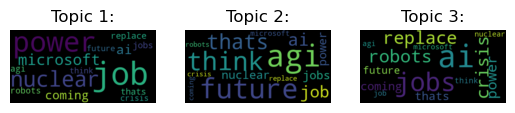

In [71]:
displayWordcloud(ldaModel, tfFeatureNames)

### Subsetting posts(title) for each topic and finding the maximum sentiment

#### Topic 1

In [148]:
topic_1 = ['ai', 'people', 'jobs', 'replace']
mask = filtered_df['tokenized_title_no_stopwords'].apply(lambda x: any(keyword in x for keyword in topic_1))

In [149]:
mask

datetime
2023-09-14 22:03:30     True
2023-09-16 16:39:41     True
2023-09-16 18:47:05    False
2023-09-18 22:27:49    False
2023-09-18 19:19:11    False
2023-09-18 22:00:43     True
2023-09-19 20:20:18     True
2023-09-20 22:45:54    False
2023-09-24 20:32:10    False
2023-09-26 18:28:37     True
2023-09-27 12:13:49     True
2023-09-28 01:36:45     True
2023-09-28 14:57:34     True
2023-09-28 15:25:22    False
2023-09-29 02:29:55    False
2023-10-02 13:55:40     True
2023-10-04 05:49:09    False
2023-10-05 07:51:18     True
2023-10-05 03:11:12    False
2023-10-06 19:14:09    False
2023-10-08 13:24:02     True
2023-10-09 16:06:02     True
2023-10-12 11:41:56     True
2023-10-14 13:28:47    False
2023-10-14 12:56:24    False
2023-10-17 17:24:18    False
Name: tokenized_title_no_stopwords, dtype: bool

In [150]:
df_topic1 = filtered_df[mask]

In [151]:
df_topic1

title  \
datetime                                                                 
2023-09-14 22:03:30        Ultimate Question (surrounding AI and Jobs)   
2023-09-16 16:39:41  Watching Westworld and I think it covers some ...   
2023-09-18 22:00:43           What I hope to see from AI in five years   
2023-09-19 20:20:18  Nearly half of CEOs believe AI could replace t...   
2023-09-26 18:28:37  Microsoft is planning to use nuclear energy to...   
2023-09-27 12:13:49  Will general purpose AI ever have enough compu...   
2023-09-28 01:36:45              The way I view the coming jobs crisis   
2023-09-28 14:57:34            The existential crisis of the age of AI   
2023-10-02 13:55:40  How many FPS (frames per second) would a robot...   
2023-10-05 07:51:18  Why do many people ignore AI as a solution to ...   
2023-10-08 13:24:02  Just to give a basic example of how cheap AI r...   
2023-10-09 16:06:02  AI is replacing customer service jobs across t...   
2023-10-12 11:41:56  What are these supposed “Risks” created by AI ...   

                                   author  score  Number of comments  \
datetime                                                               
2023-09-14 22:03:30   Serious-Cucumber-54     13                   7   
2023-09-16 16:39:41                 Arowx      5                  14   
2023-09-18 22:00:43                Xx255q     26                  29   
2023-09-19 20:20:18    MatematicoDiscreto    212                  22   
2023-09-26 18:28:37             meowerguy     15                   0   
2023-09-27 12:13:49   Adventurous-Cry7839     75                 110   
2023-09-28 01:36:45  Glittering-Neck-2505     71                 107   
2023-09-28 14:57:34         NeuralNexusXO    125                 136   
2023-10-02 13:55:40  Interesting-Cake-691      9                  32   
2023-10-05 07:51:18       throwaway472105    116                 360   
2023-10-08 13:24:02         cloudrunner69    291                 410   
2023-10-09 16:06:02  SharpCartographer831    489                 242   
2023-10-12 11:41:56            BigZaddyZ3      8                  73   

                                                             self text  \
datetime                                                                 
2023-09-14 22:03:30  The ultimate question is whether AI will lower...   
2023-09-16 16:39:41  What fictional works do you think raise the mo...   
2023-09-18 22:00:43  This is from the perspective a 28-year-old Mic...   
2023-09-19 20:20:18                                                      
2023-09-26 18:28:37                                                      
2023-09-27 12:13:49  I feel it will take atleast 1 human generation...   
2023-09-28 01:36:45  Here’s how I personally see it. A lot of peopl...   
2023-09-28 14:57:34  It's almost delightful, isn't it? The fear of ...   
2023-10-02 13:55:40  GPT-4V has very good visual capabilities and I...   
2023-10-05 07:51:18  A big issue of falling birthrates are an incre...   
2023-10-08 13:24:02  Ok, so Spot the robot dog was released about t...   
2023-10-09 16:06:02                                                      
2023-10-12 11:41:56  This question is really more of a continuation...   

                        timestamp  upvoteratio  \
datetime                                         
2023-09-14 22:03:30  1.694729e+09         0.85   
2023-09-16 16:39:41  1.694882e+09         0.58   
2023-09-18 22:00:43  1.695074e+09         0.81   
2023-09-19 20:20:18  1.695155e+09         0.98   
2023-09-26 18:28:37  1.695753e+09         0.84   
2023-09-27 12:13:49  1.695817e+09         0.83   
2023-09-28 01:36:45  1.695865e+09         0.91   
2023-09-28 14:57:34  1.695913e+09         0.84   
2023-10-02 13:55:40  1.696255e+09         0.72   
2023-10-05 07:51:18  1.696492e+09         0.79   
2023-10-08 13:24:02  1.696771e+09         0.90   
2023-10-09 16:06:02  1.696868e+09         0.97   
2023-10-12 11:41:56  1.697111e+09         0.60   

           

In [152]:
index = df_topic1['sentiment'].idxmin()
print(df_topic1.loc[index]['title'],'\nSentiment:',df_topic1.loc[index]['sentiment'])

What are these supposed “Risks” created by AI Regulation/Centralization?? 
Sentiment: -15.0


(array([19613., 19617., 19621., 19625., 19629., 19631., 19635., 19639.,
        19643.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

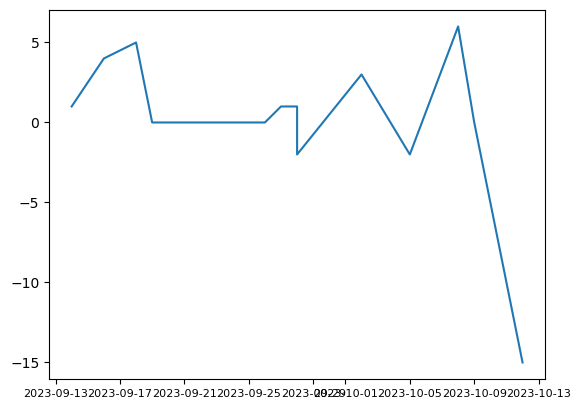

In [153]:
plt.plot(df_topic1['date'],df_topic1['sentiment'])
plt.xticks(fontsize=8)

### Subsetting posts(content) for each topic and finding the maximum sentiment

#### Topic 1

In [154]:
topic_1 = ['ai', 'people', 'jobs', 'replace']
mask = filtered_df['tokenized_text_no_stopwords'].apply(lambda x: all(keyword in x for keyword in topic_1))
df_topic1 = filtered_df[mask]

In [155]:
index = df_topic1['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic1.loc[index]['title'],"\033[0m")
print(df_topic1.loc[index]['self text'],'\nSentiment:',df_topic1.loc[index]['sentiment_text_vader'])

 This is so surreal. Everything is accelerating. 
We all know what is coming and what exponential growth means. But we don't know how it FEELS. Latest RT-X with robotic, GPT-4V and Dall-E 3 are just so incredible and borderline scary.

I don't think we have time to experience job losses, disinformation, massive security fraud, fake idenitity and much of the fear that most people have simply because that the world would have no time to catch up.

Things are moving way too fast for any tech to monitize it. Let's do a thought experiment on what the current AI systems could do. It would probably replace or at least change a lot of professions like teachers, tutors, designers, engineers, doctors, laywers and a bunch more you name it. However, we don't have time for that.

The world is changing way too slowly for taking advantage of any of the breakthough. I think there is a real chance that we run straight to AGI and beyond. 

By this rate, a robot which is capable of doing the most basic h

### Bi-grams

#### With tokenized title

In [160]:
from nltk import ngrams
from collections import Counter
all_tokens=[]
filtered_df['tokenized_title_no_stopwords'].apply(lambda x: all_tokens.append(x))

datetime
2023-09-14 22:03:30    None
2023-09-16 16:39:41    None
2023-09-16 18:47:05    None
2023-09-18 22:27:49    None
2023-09-18 19:19:11    None
2023-09-18 22:00:43    None
2023-09-19 20:20:18    None
2023-09-20 22:45:54    None
2023-09-24 20:32:10    None
2023-09-26 18:28:37    None
2023-09-27 12:13:49    None
2023-09-28 01:36:45    None
2023-09-28 14:57:34    None
2023-09-28 15:25:22    None
2023-09-29 02:29:55    None
2023-10-02 13:55:40    None
2023-10-04 05:49:09    None
2023-10-05 07:51:18    None
2023-10-05 03:11:12    None
2023-10-06 19:14:09    None
2023-10-08 13:24:02    None
2023-10-09 16:06:02    None
2023-10-12 11:41:56    None
2023-10-14 13:28:47    None
2023-10-14 12:56:24    None
2023-10-17 17:24:18    None
Name: tokenized_title_no_stopwords, dtype: object

In [161]:
bigrams = [list(ngrams(tokens, 2)) for tokens in all_tokens]
flat_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_counter = Counter(flat_bigrams)
top_n = 10
top_bigrams = bigram_counter.most_common(top_n)


In [162]:
top_bigrams


[(('replace', 'jobs'), 2),
 (('ultimate', 'question'), 1),
 (('question', 'surrounding'), 1),
 (('surrounding', 'ai'), 1),
 (('ai', 'jobs'), 1),
 (('watching', 'westworld'), 1),
 (('westworld', 'think'), 1),
 (('think', 'covers'), 1),
 (('covers', 'interesting'), 1),
 (('interesting', 'concepts'), 1)]

#### With tokenized text 

In [163]:
all_tokens=[]
filtered_df['tokenized_text_no_stopwords'].apply(lambda x: all_tokens.append(x))

datetime
2023-09-14 22:03:30    None
2023-09-16 16:39:41    None
2023-09-16 18:47:05    None
2023-09-18 22:27:49    None
2023-09-18 19:19:11    None
2023-09-18 22:00:43    None
2023-09-19 20:20:18    None
2023-09-20 22:45:54    None
2023-09-24 20:32:10    None
2023-09-26 18:28:37    None
2023-09-27 12:13:49    None
2023-09-28 01:36:45    None
2023-09-28 14:57:34    None
2023-09-28 15:25:22    None
2023-09-29 02:29:55    None
2023-10-02 13:55:40    None
2023-10-04 05:49:09    None
2023-10-05 07:51:18    None
2023-10-05 03:11:12    None
2023-10-06 19:14:09    None
2023-10-08 13:24:02    None
2023-10-09 16:06:02    None
2023-10-12 11:41:56    None
2023-10-14 13:28:47    None
2023-10-14 12:56:24    None
2023-10-17 17:24:18    None
Name: tokenized_text_no_stopwords, dtype: object

In [164]:
bigrams = [list(ngrams(tokens, 2)) for tokens in all_tokens]
flat_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_counter = Counter(flat_bigrams)
top_n = 30
top_bigrams = bigram_counter.most_common(top_n)


In [165]:
top_bigrams

[(('forms', 'reasoning'), 5),
 (('lowers', 'average'), 4),
 (('average', 'incomes'), 4),
 (('reasoning', 'involves'), 4),
 (('dont', 'think'), 4),
 (('ai', 'could'), 4),
 (('dont', 'know'), 4),
 (('average', 'joe'), 4),
 (('ai', 'lowers'), 3),
 (('lowers', 'col'), 3),
 (('incomes', 'purchasing'), 3),
 (('purchasing', 'power'), 3),
 (('ai', 'replace'), 3),
 (('ai', 'systems'), 3),
 (('would', 'end'), 3),
 (('real', 'war'), 3),
 (('universal', 'income'), 3),
 (('wan', 'na'), 3),
 (('everyone', 'else'), 3),
 (('free', 'time'), 3),
 (('time', 'money'), 3),
 (('people', 'become'), 2),
 (('great', 'job'), 2),
 (('humanity', 'could'), 2),
 (('human', 'intelligence'), 2),
 (('im', 'really'), 2),
 (('solve', 'problems'), 2),
 (('agi', 'able'), 2),
 (('make', 'predictions'), 2),
 (('deductive', 'reasoning'), 2)]

### Unigram

#### With tokenized title

In [166]:
all_tokens=[]
filtered_df['tokenized_title_no_stopwords'].apply(lambda x: all_tokens.append(x))

datetime
2023-09-14 22:03:30    None
2023-09-16 16:39:41    None
2023-09-16 18:47:05    None
2023-09-18 22:27:49    None
2023-09-18 19:19:11    None
2023-09-18 22:00:43    None
2023-09-19 20:20:18    None
2023-09-20 22:45:54    None
2023-09-24 20:32:10    None
2023-09-26 18:28:37    None
2023-09-27 12:13:49    None
2023-09-28 01:36:45    None
2023-09-28 14:57:34    None
2023-09-28 15:25:22    None
2023-09-29 02:29:55    None
2023-10-02 13:55:40    None
2023-10-04 05:49:09    None
2023-10-05 07:51:18    None
2023-10-05 03:11:12    None
2023-10-06 19:14:09    None
2023-10-08 13:24:02    None
2023-10-09 16:06:02    None
2023-10-12 11:41:56    None
2023-10-14 13:28:47    None
2023-10-14 12:56:24    None
2023-10-17 17:24:18    None
Name: tokenized_title_no_stopwords, dtype: object

In [167]:
unigrams = [list(ngrams(tokens, 1)) for tokens in all_tokens]
flat_unigrams = [unigram for sublist in unigrams for unigram in sublist]
unigram_counter = Counter(flat_unigrams)
top_n = 10
top_unigrams = unigram_counter.most_common(top_n)
top_unigrams

[(('ai',), 11),
 (('jobs',), 6),
 (('agi',), 3),
 (('would',), 3),
 (('power',), 3),
 (('job',), 3),
 (('future',), 3),
 (('think',), 2),
 (('thats',), 2),
 (('robots',), 2)]

#### With tokenized text

In [168]:
all_tokens=[]
filtered_df['tokenized_text_no_stopwords'].apply(lambda x: all_tokens.append(x))

datetime
2023-09-14 22:03:30    None
2023-09-16 16:39:41    None
2023-09-16 18:47:05    None
2023-09-18 22:27:49    None
2023-09-18 19:19:11    None
2023-09-18 22:00:43    None
2023-09-19 20:20:18    None
2023-09-20 22:45:54    None
2023-09-24 20:32:10    None
2023-09-26 18:28:37    None
2023-09-27 12:13:49    None
2023-09-28 01:36:45    None
2023-09-28 14:57:34    None
2023-09-28 15:25:22    None
2023-09-29 02:29:55    None
2023-10-02 13:55:40    None
2023-10-04 05:49:09    None
2023-10-05 07:51:18    None
2023-10-05 03:11:12    None
2023-10-06 19:14:09    None
2023-10-08 13:24:02    None
2023-10-09 16:06:02    None
2023-10-12 11:41:56    None
2023-10-14 13:28:47    None
2023-10-14 12:56:24    None
2023-10-17 17:24:18    None
Name: tokenized_text_no_stopwords, dtype: object

In [169]:
unigrams = [list(ngrams(tokens, 1)) for tokens in all_tokens]
flat_unigrams = [unigram for sublist in unigrams for unigram in sublist]
unigram_counter = Counter(flat_unigrams)
top_n = 30
top_unigrams = unigram_counter.most_common(top_n)
top_unigrams

[(('ai',), 42),
 (('would',), 32),
 (('reasoning',), 30),
 (('people',), 28),
 (('jobs',), 23),
 (('like',), 22),
 (('time',), 22),
 (('agi',), 20),
 (('think',), 17),
 (('could',), 16),
 (('human',), 16),
 (('job',), 15),
 (('make',), 15),
 (('one',), 14),
 (('dont',), 14),
 (('way',), 13),
 (('world',), 13),
 (('really',), 13),
 (('years',), 13),
 (('much',), 12),
 (('youre',), 12),
 (('government',), 12),
 (('robot',), 12),
 (('average',), 11),
 (('im',), 11),
 (('future',), 11),
 (('know',), 11),
 (('thing',), 11),
 (('robots',), 11),
 (('say',), 11)]